
## Advanced Linear Regression Assignment
## Housing prediction
### Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

### Bussiness Goal
It is required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Assignment Workflow

**1.Data understanding**<br>
1.Import libraries required<br>
2.Load dataset<br>
3.identify info,description,shape & size<br>
4.Identify first and last 5 rows<br>

**2.DataCleaning & manipulation**<br>
1.Identify and resolve missing values<br>
2.Identify and resolve data redundancy<br>
3.Identify and convert to proper datatypes<br>
4.Identify and create derived columns wherever required<br>

**3.EDA process**<br>
1.Define functions
2.Univariant Analysis<br>
3.Segmented Analysis<br>
4.Bivarient Analysis<br>
5.Identify correlation<br>
6.Identify 5 important driver variables<br>
7.Make correct assumptions<br>


**4.Model Building & Evaluation**<br>

**1. Linear Regression Model<br>

**2.Ridge Regression Model<br>

**3.Lasso Regression Model<br>

**4.Prediction<br>

**.Subjective Questions-PDF**<br>



# Data understandng
#### Import Libraries required for data analysis in EDA

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')



In [198]:

#To view more rows and columns in the dataset
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)

#### Load & read dataset from folder path

In [215]:
house_data = pd.read_csv('train.csv')
#reading the data
house_data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

#### Understanding the Data Dictionary and parts of Data Preparation

The data dictionary contains the meaning of various attributes; some of which are explored and manipulated here:

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)


In [216]:
#find top 5 rows of dataset
house_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [217]:
#find last 5 rows of dataset
house_data.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA        TA     CBlock       TA       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3             1          TA   

   

In [218]:
#shape of house_data- relates to the size of the dimensions of an N-dimensional array.
#it contains 1460 rows and 81 columns
house_data.shape

(1460, 81)

In [219]:
#size of loan_data-the amount of data is 1460x81=11680
house_data.size

118260

In [220]:
#identify  train.csv dataset description
house_data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [221]:
#identify  house_data info
print(house_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Data Cleaning

#### Missing value imputatation

In [222]:
#Identify missing value columns there in dataset
missing_values=house_data.isna().sum()
print(missing_values)

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [223]:
missing_value_columns=missing_values[missing_values > 0]
print(missing_value_columns.count())
print(missing_value_columns)

19
LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [224]:
missing_values_count = house_data.isnull().sum()

# Drop columns with missing values greater than 700

columns_to_drop = missing_values_count[missing_values_count >= 700].index
house_data = house_data.drop(columns=columns_to_drop)
house_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0         NaN     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd   
3  

In [225]:

missing_values=house_data.isna().sum()
missing_value_columns=missing_values[missing_values > 0]
print(missing_value_columns.count())
print(missing_value_columns)

15
LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64


#### identify unique vaues of missing value columns

In [238]:
house_data['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [226]:
house_data['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [239]:
house_data['MasVnrArea'].unique()

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

In [227]:
house_data['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [228]:
house_data['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [229]:
house_data['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [230]:
house_data['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [231]:
house_data['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [232]:
house_data['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [233]:
house_data['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [234]:
house_data['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [235]:
house_data['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [236]:
house_data['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [237]:
house_data['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [240]:
# fill missing vaues to categorical variables with data type object

house_data[['MasVnrType']] = house_data[['MasVnrType']].fillna(value="No MasVnrType")
house_data[['BsmtQual']] = house_data[['BsmtQual']].fillna(value="No Basement")
house_data[['BsmtCond']] = house_data[['BsmtCond']].fillna(value="No Basement")
house_data[['BsmtExposure']] = house_data[['BsmtExposure']].fillna(value="No Basement")
house_data[['BsmtFinType1']] = house_data[['BsmtFinType1']].fillna(value="No Basement")
house_data[['BsmtFinType2']] = house_data[['BsmtFinType2']].fillna(value="No Basement")
house_data[['Electrical']] = house_data[['Electrical']].fillna(value="No Electrical")
house_data[['FireplaceQu']] = house_data[['FireplaceQu']].fillna(value="No Fireplace")
house_data[['GarageType']] = house_data[['GarageType']].fillna(value="No Garage")
house_data[['GarageFinish']] = house_data[['GarageFinish']].fillna(value="No Garage")
house_data[['GarageQual']] = house_data[['GarageQual']].fillna(value="No Garage")
house_data[['GarageCond']] = house_data[['GarageCond']].fillna(value="No Garage")


###  fill median value to LotFrontage & MasVnrArea nan values

In [241]:
#check median of LotFrontage
LotFrontage_median = house_data.LotFrontage.median()
LotFrontage_median

69.0

In [242]:
#impute missing values of LotFrontage with median due to some outliers in data shown from Descibe section
house_data.LotFrontage = house_data.LotFrontage.fillna(LotFrontage_median)

In [243]:
median_msnrtype=house_data['MasVnrArea'].median()
house_data[['MasVnrArea']] = house_data[['MasVnrArea']].fillna(value=median_msnrtype)

In [244]:
house_data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL         62.0     7917   Pave      Reg   
1456  1457          20       RL         85.0    13175   Pave      Reg   
1457  1458          70       RL         66.0     9042   Pave      Reg   
1458  1459          20       RL         68.0     9717   Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   
4          350.0        Gd        TA      PConc       Gd       TA   
..

From the above missing value imputation, we can infer that all the 16 columns data doesnt contain any missing value hence it is 0.

#### Data type conversions

##### Identify datatypes of columns 

In [170]:
house_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


In [ ]:
# we could see that the target variable SalePrice is in int64 datat type, lets convert it into float64.

In [246]:
house_data['SalePrice']=house_data['SalePrice'].astype('float64')
house_data['SalePrice'].dtypes

dtype('float64')

##### Identify year columns

In [21]:
house_data['YearBuilt'].unique()

array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
       1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
       1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
       1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
       1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
       1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
       1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
       1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917,
       1872, 1905], dtype=int64)

In [247]:
house_data['YrSold'].unique()

array([2008, 2007, 2006, 2009, 2010], dtype=int64)

In [22]:
     
house_data['YearRemodAdd'].unique()

array([2003, 1976, 2002, 1970, 2000, 1995, 2005, 1973, 1950, 1965, 2006,
       1962, 2007, 1960, 2001, 1967, 2004, 2008, 1997, 1959, 1990, 1955,
       1983, 1980, 1966, 1963, 1987, 1964, 1972, 1996, 1998, 1989, 1953,
       1956, 1968, 1981, 1992, 2009, 1982, 1961, 1993, 1999, 1985, 1979,
       1977, 1969, 1958, 1991, 1971, 1952, 1975, 2010, 1984, 1986, 1994,
       1988, 1954, 1957, 1951, 1978, 1974], dtype=int64)

#### Handling date columns

from above datatypes, it is visible that the date information-dteday column is in object data type.
So dteday column will be converted to  date column

In [22]:
# Converting date to datetime format
house_data['YearBuilt'] = pd.to_datetime(house_data['YearBuilt'])



In [23]:
# Converting date to datetime format
house_data['YearRemodAdd'] = pd.to_datetime(house_data['YearRemodAdd'])



In [248]:
#calculate the age of house 
house_data['HouseAge'] = house_data.YrSold - house_data.YearBuilt
house_data['HouseAge']

0        5
1       31
2        7
3       91
4        8
        ..
1455     8
1456    32
1457    69
1458    60
1459    43
Name: HouseAge, Length: 1460, dtype: int64

In [249]:
# Creating a new Column to determine the remodel age
house_data['remodel_age'] = house_data['YrSold'] - house_data['YearRemodAdd']
house_data['remodel_age']

0        5
1       31
2        6
3       36
4        8
        ..
1455     7
1456    22
1457     4
1458    14
1459    43
Name: remodel_age, Length: 1460, dtype: int64

In [250]:
house_data['garage_age'] = house_data['YrSold'] - house_data['GarageYrBlt']
house_data['garage_age'] 

0        5.0
1       31.0
2        7.0
3        8.0
4        8.0
        ... 
1455     8.0
1456    32.0
1457    69.0
1458    60.0
1459    43.0
Name: garage_age, Length: 1460, dtype: float64

In [252]:
house_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


Identify Categorical variables & its unique values:

In [254]:
# MSSubclass is a categorical variable but it is of datatype int64. lets convert it into object type
house_data['MSSubClass']=house_data['MSSubClass'].astype('object')
house_data['MSSubClass']

0       60
1       20
2       60
3       70
4       60
        ..
1455    60
1456    20
1457    70
1458    20
1459    20
Name: MSSubClass, Length: 1460, dtype: object

In [255]:

# OverallQual is a categorical variable but it is of datatype int64. lets convert it into object type
house_data['OverallQual']=house_data['OverallQual'].astype('object')
house_data['OverallQual']

0       7
1       6
2       7
3       7
4       8
       ..
1455    6
1456    6
1457    7
1458    5
1459    5
Name: OverallQual, Length: 1460, dtype: object

In [256]:

# OverallCond is a categorical variable but it is of datatype int64. lets convert it into object type
house_data['OverallCond']=house_data['OverallCond'].astype('object')
house_data['OverallCond']

0       5
1       8
2       5
3       5
4       5
       ..
1455    5
1456    6
1457    9
1458    6
1459    6
Name: OverallCond, Length: 1460, dtype: object

In [ ]:

# OverallCond is a categorical variable but it is of datatype int64. lets convert it into object type
house_data['OverallCond']=house_data['OverallCond'].astype('object')
house_data['OverallCond']

In [257]:
house_data.BsmtFinType1.unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'No Basement', 'LwQ'],
      dtype=object)

In [178]:
#convert ExterQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [179]:
#convert BsmtQual 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [180]:
#convert BsmtExposure 0,1,2,3,4 -> NA, No, Mn, Av, gd
house_data = house_data.replace({'BsmtExposure':{'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})

In [181]:
#convert BsmtFinType1 0,1,2,3,4,5,6 -> NA, Unf, LwQ, Rec, BLQ, ALQ, GLQ
house_data = house_data.replace({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})

In [182]:
#convert HeatingQC 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [183]:
#convert KitchenQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [184]:
#convert FireplaceQu 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'FireplaceQu':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [185]:
house_data['FireplaceQu']

0       No Fireplace
1                  3
2                  3
3                  4
4                  3
            ...     
1455               3
1456               3
1457               4
1458    No Fireplace
1459    No Fireplace
Name: FireplaceQu, Length: 1460, dtype: object

In [186]:
#convert MSSubClass into object type 
convert_dict = {'MSSubClass':object}
house_data = house_data.astype(convert_dict)

In [330]:
#We could see that season, month,weekday and weathersit columns having
#values in integer. Lets look into the unique values

In [409]:
#Identify season column unique values
print("season :",house_data.season.unique())
#Identify month column unique values
print("month :",house_data.mnth.unique())
#Identify weathersit column unique values
print("weathersit :",house_data.weathersit.unique())
#Identify workingday column unique values
print("workingday :",house_data.workingday.unique())
#Identify weekday column unique values
print("weekday :",house_data.weekday.unique())


season : [1 2 3 4]
month : [ 1  2  3  4  5  6  7  8  9 10 11 12]
weathersit : [2 1 3]
workingday : [0 1]
weekday : [6 0 1 2 3 4 5]


In [19]:
##### Create custom mapping for categorical variables

In [410]:
house_data['season'].astype('category').value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [411]:
#changing categorical numeric value of season column into meaningful names
house_data.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
house_data['season'].astype('category').value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [412]:
# A function to  map the actual numbers of month to categorical names.
def month_map(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

# Applying the function to the mnth columns
house_data[['mnth']] = house_data[['mnth']].apply(month_map)


house_data['mnth'].astype('category').value_counts()

Aug     62
Dec     62
Jan     62
Jul     62
Mar     62
May     62
Oct     62
Apr     60
Jun     60
Nov     60
Sept    60
Feb     56
Name: mnth, dtype: int64

In [226]:
house_data['weekday'].astype('category').value_counts()

0    105
1    105
6    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [413]:
# map the actual numbers of weekday column to categorical names.


#Mapping Weekday
house_data.weekday = house_data.weekday.map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'})

# Lets overl
house_data['weekday'].astype('category').value_counts()


Mon      105
Tues     105
Wed      105
Sat      104
Sun      104
Thurs    104
Fri      103
Name: weekday, dtype: int64

In [230]:
house_data['weathersit'].astype('category').value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [415]:
# Replacing  weathersit numeric values into string values for better readability

# 1-Clear, Few clouds, Partly cloudy, Partly cloudy
house_data.loc[(house_data['weathersit'] == 1) , 'weathersit'] = 'Clear'

# 2-Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
house_data.loc[(house_data['weathersit'] == 2) , 'weathersit'] = 'Mist_Cloudy'

# 3-Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
house_data.loc[(house_data['weathersit'] == 3) , 'weathersit'] = 'Light_Snow_Rain'

# 4-Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
house_data.loc[(house_data['weathersit'] == 4) , 'weathersit'] = 'Heavy_Rain_Thunder'


house_data['weathersit'].astype('category').value_counts()

Clear              463
Mist_Cloudy        246
Light_Snow_Rain     21
Name: weathersit, dtype: int64

In [232]:
# whether day is a holiday or not (0: No, 1: Yes)
house_data['holiday'].astype('category').value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [336]:
# whether day is a holiday or not (0: No, 1: Yes)
house_data['workingday'].astype('category').value_counts()

1    499
0    231
Name: workingday, dtype: int64

# Drop unwanted variables

In [30]:
# Dropping ID Columns from dataset since it is not useful in the prediction 
house_data.drop('Id', axis=1, inplace=True)
house_data

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0             60       RL     8450   Pave      Reg         Lvl    AllPub   
1             20       RL     9600   Pave      Reg         Lvl    AllPub   
2             60       RL    11250   Pave      IR1         Lvl    AllPub   
3             70       RL     9550   Pave      IR1         Lvl    AllPub   
4             60       RL    14260   Pave      IR1         Lvl    AllPub   
...          ...      ...      ...    ...      ...         ...       ...   
1455          60       RL     7917   Pave      Reg         Lvl    AllPub   
1456          20       RL    13175   Pave      Reg         Lvl    AllPub   
1457          70       RL     9042   Pave      Reg         Lvl    AllPub   
1458          20       RL     9717   Pave      Reg         Lvl    AllPub   
1459          20       RL     9937   Pave      Reg         Lvl    AllPub   

     LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0       Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1          FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2       Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3       Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4          FR2       Gtl      NoRidge       Norm       Norm     1Fam   
...        ...       ...          ...        ...        ...      ...   
1455    Inside       Gtl      Gilbert       Norm       Norm     1Fam   
1456    Inside       Gtl       NWAmes       Norm       Norm     1Fam   
1457    Inside       Gtl      Crawfor       Norm       Norm     1Fam   
1458    Inside       Gtl        NAmes       Norm       Norm     1Fam   
1459    Inside       Gtl      Edwards       Norm       Norm     1Fam   

     HouseStyle  OverallQual  OverallCond                     YearBuilt  \
0        2Story            7            5 1970-01-01 00:00:00.000002003   
1        1Story            6            8 1970-01-01 00:00:00.000001976   
2        2Story            7            5 1970-01-01 00:00:00.000002001   
3        2Story            7            5 1970-01-01 00:00:00.000001915   
4        2Story            8            5 1970-01-01 00:00:00.000002000   
...         ...          ...          ...                           ...   
1455     2Story            6            5 1970-01-01 00:00:00.000001999   
1456     1Story            6            6 1970-01-01 00:00:00.000001978   
1457     2Story            7            9 1970-01-01 00:00:00.000001941   
1458     1Story            5            6 1970-01-01 00:00:00.000001950   
1459     1Story            5            6 1970-01-01 00:00:00.000001965   

                      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0    1970-01-01 00:00:00.000002003     Gable  CompShg     VinylSd     VinylSd   
1    1970-01-01 00:00:00.000001976     Gable  CompShg     MetalSd     MetalSd   
2    1970-01-01 00:00:00.000002002     Gable  CompShg     VinylSd     VinylSd   
3    1970-01-01 00:00:00.000001970     Gable  CompShg     Wd Sdng     Wd Shng   
4    1970-01-01 00:00:00.000002000     Gable  CompShg     VinylSd     VinylSd   
...                            ...       ...      ...         ...         ...   
1455 1970-01-01 00:00:00.000002000     Gable  CompShg     VinylSd     VinylSd   
1456 1970-01-01 00:00:00.000001988     Gable  CompShg     Plywood     Plywood   
1457 1970-01-01 00:00:00.000002006     Gable  CompShg     CemntBd     CmentBd   
1458 1970-01-01 00:00:00.000001996       Hip  CompShg     MetalSd     MetalSd   
1459 1970-01-01 00:00:00.000001965     Gable  CompShg     HdBoard     HdBoard   

     MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0       BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1          None         0.0        TA        TA     CBlock       Gd       TA   
2       BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3          None         0.0       

In [188]:
#Drop YrSold, YearBuilt after HouseAge
house_data=house_data.drop(columns=['YrSold', 'YearBuilt'])

KeyError: "['YrSold', 'YearBuilt'] not found in axis"

KeyError: 'YrSold'

# EDA

###  Data Visualization using Univariate and Bivariate analysis



#### Univariate Analysis

In [189]:
#Visualising numerical predictor variables with Target Variables
df_num = house_data.select_dtypes(include=['float64'])
df_num

LotFrontage  MasVnrArea  garage_age
0            65.0       196.0         5.0
1            80.0         0.0        31.0
2            68.0       162.0         7.0
3            60.0         0.0         8.0
4            84.0       350.0         8.0
...           ...         ...         ...
1455         62.0         0.0         8.0
1456         85.0       119.0        32.0
1457         66.0         0.0        69.0
1458         68.0         0.0        60.0
1459         75.0         0.0        43.0

[1460 rows x 3 columns]

In [190]:
cat_variables = house_data.select_dtypes(include=['object'])
cat_variables

MSSubClass MSZoning Street LotShape LandContour Utilities LotConfig  \
0            60       RL   Pave      Reg         Lvl    AllPub    Inside   
1            20       RL   Pave      Reg         Lvl    AllPub       FR2   
2            60       RL   Pave      IR1         Lvl    AllPub    Inside   
3            70       RL   Pave      IR1         Lvl    AllPub    Corner   
4            60       RL   Pave      IR1         Lvl    AllPub       FR2   
...         ...      ...    ...      ...         ...       ...       ...   
1455         60       RL   Pave      Reg         Lvl    AllPub    Inside   
1456         20       RL   Pave      Reg         Lvl    AllPub    Inside   
1457         70       RL   Pave      Reg         Lvl    AllPub    Inside   
1458         20       RL   Pave      Reg         Lvl    AllPub    Inside   
1459         20       RL   Pave      Reg         Lvl    AllPub    Inside   

     LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0          Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1          Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2          Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3          Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4          Gtl      NoRidge       Norm       Norm     1Fam     2Story   
...        ...          ...        ...        ...      ...        ...   
1455       Gtl      Gilbert       Norm       Norm     1Fam     2Story   
1456       Gtl       NWAmes       Norm       Norm     1Fam     1Story   
1457       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
1458       Gtl        NAmes       Norm       Norm     1Fam     1Story   
1459       Gtl      Edwards       Norm       Norm     1Fam     1Story   

     RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterCond  \
0        Gable  CompShg     VinylSd     VinylSd    BrkFace        TA   
1        Gable  CompShg     MetalSd     MetalSd       None        TA   
2        Gable  CompShg     VinylSd     VinylSd    BrkFace        TA   
3        Gable  CompShg     Wd Sdng     Wd Shng       None        TA   
4        Gable  CompShg     VinylSd     VinylSd    BrkFace        TA   
...        ...      ...         ...         ...        ...       ...   
1455     Gable  CompShg     VinylSd     VinylSd       None        TA   
1456     Gable  CompShg     Plywood     Plywood      Stone        TA   
1457     Gable  CompShg     CemntBd     CmentBd       None        Gd   
1458       Hip  CompShg     MetalSd     MetalSd       None        TA   
1459     Gable  CompShg     HdBoard     HdBoard       None        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
0         PConc        4       TA            1            6          Unf   
1        CBlock        4       TA            4            5          Unf   
2         PConc        4       TA            2            6          Unf   
3        BrkTil        3       Gd            1            5          Unf   
4         PConc        4       TA            3            6          Unf   
...         ...      ...      ...          ...          ...          ...   
1455      PConc        4       TA            1            1          Unf   
1456     CBlock        4       TA            1            5          Rec   
1457      Stone        3       Gd            1            6          Unf   
1458     CBlock        3       TA            2            6          Rec   
1459     CBlock        3       TA            1            4          LwQ   

     Heating CentralAir Electrical Functional   FireplaceQu GarageType  \
0       GasA          Y      SBrkr        Typ  No Fireplace     Attchd   
1       GasA          Y      SBrkr        Typ             3     Attchd   
2       GasA          Y      SBrkr        Typ             3     Attchd   
3       GasA          Y      SBrkr        Typ             4     Detchd   
4       GasA          Y      SBrkr        Typ             3     Att

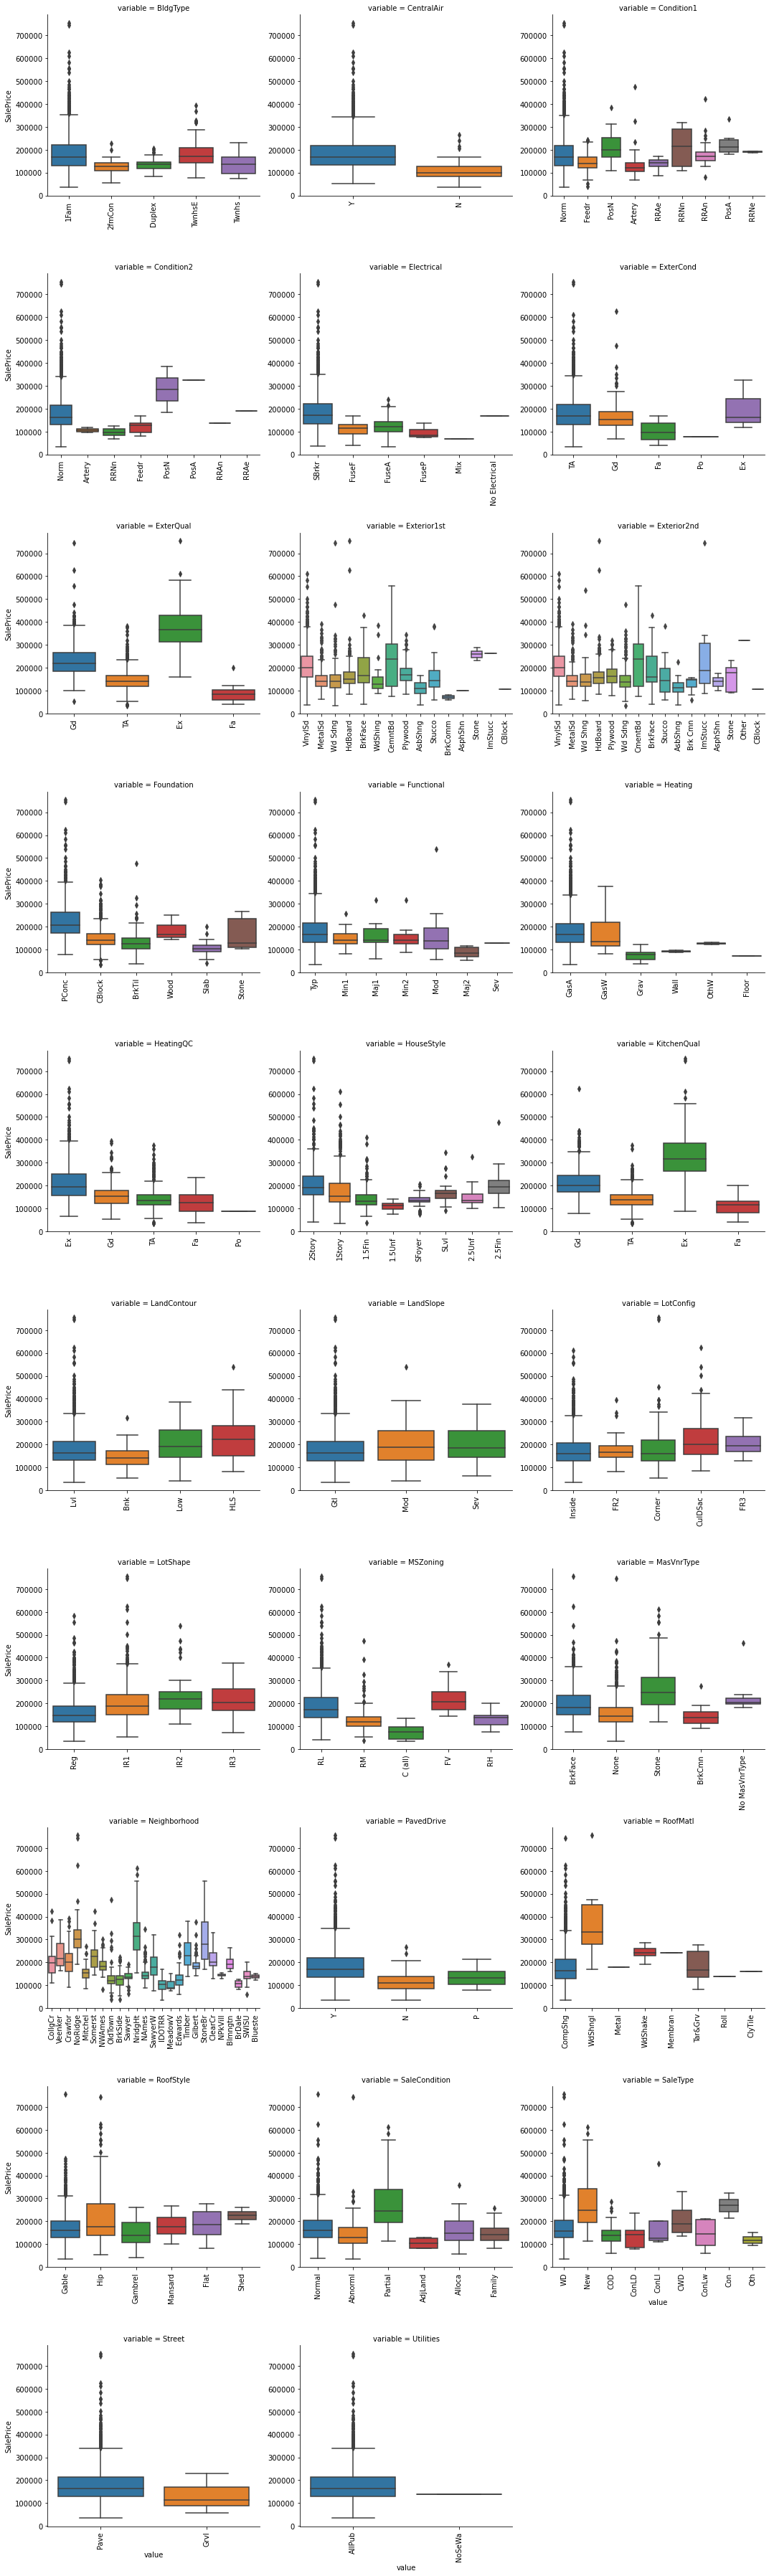

In [50]:
# Plotting Categorical Features with Sale Price
def facetgrid_boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
categorical = house_data.select_dtypes(include=['object'])
f = pd.melt(house_data,id_vars=['SalePrice'], value_vars=sorted(house_data[categorical.columns]))
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(facetgrid_boxplot, "value", "SalePrice")

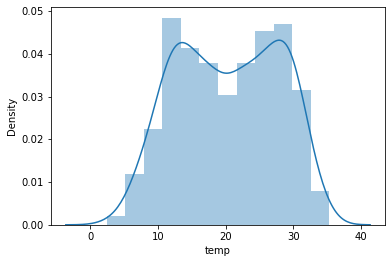

In [417]:
# temperature
sns.distplot(house_data['temp'])
plt.show()

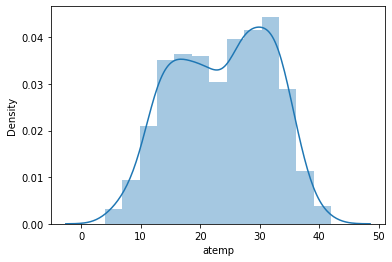

In [ ]:
# feeling temperature
sns.distplot(house_data['atemp'])
plt.show()

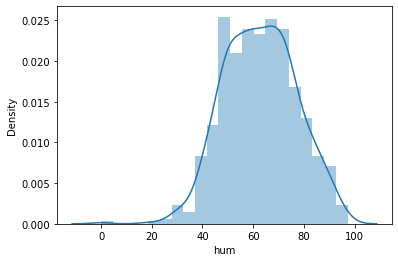

In [ ]:
# humidity
sns.distplot(house_data['hum'])
plt.show()

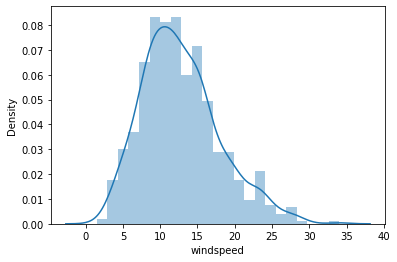

In [ ]:
# wind speed
sns.distplot(house_data['windspeed'])
plt.show()

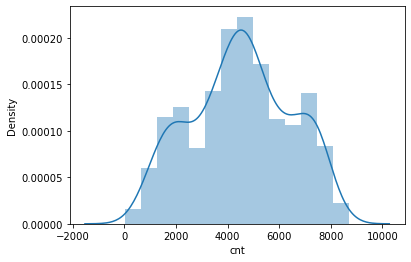

In [ ]:
# Target variable: count of total rental bikes including both casual and registered
sns.distplot(house_data['cnt'])
plt.show()

### Visualize data using pair plots

<Figure size 1080x2160 with 0 Axes>

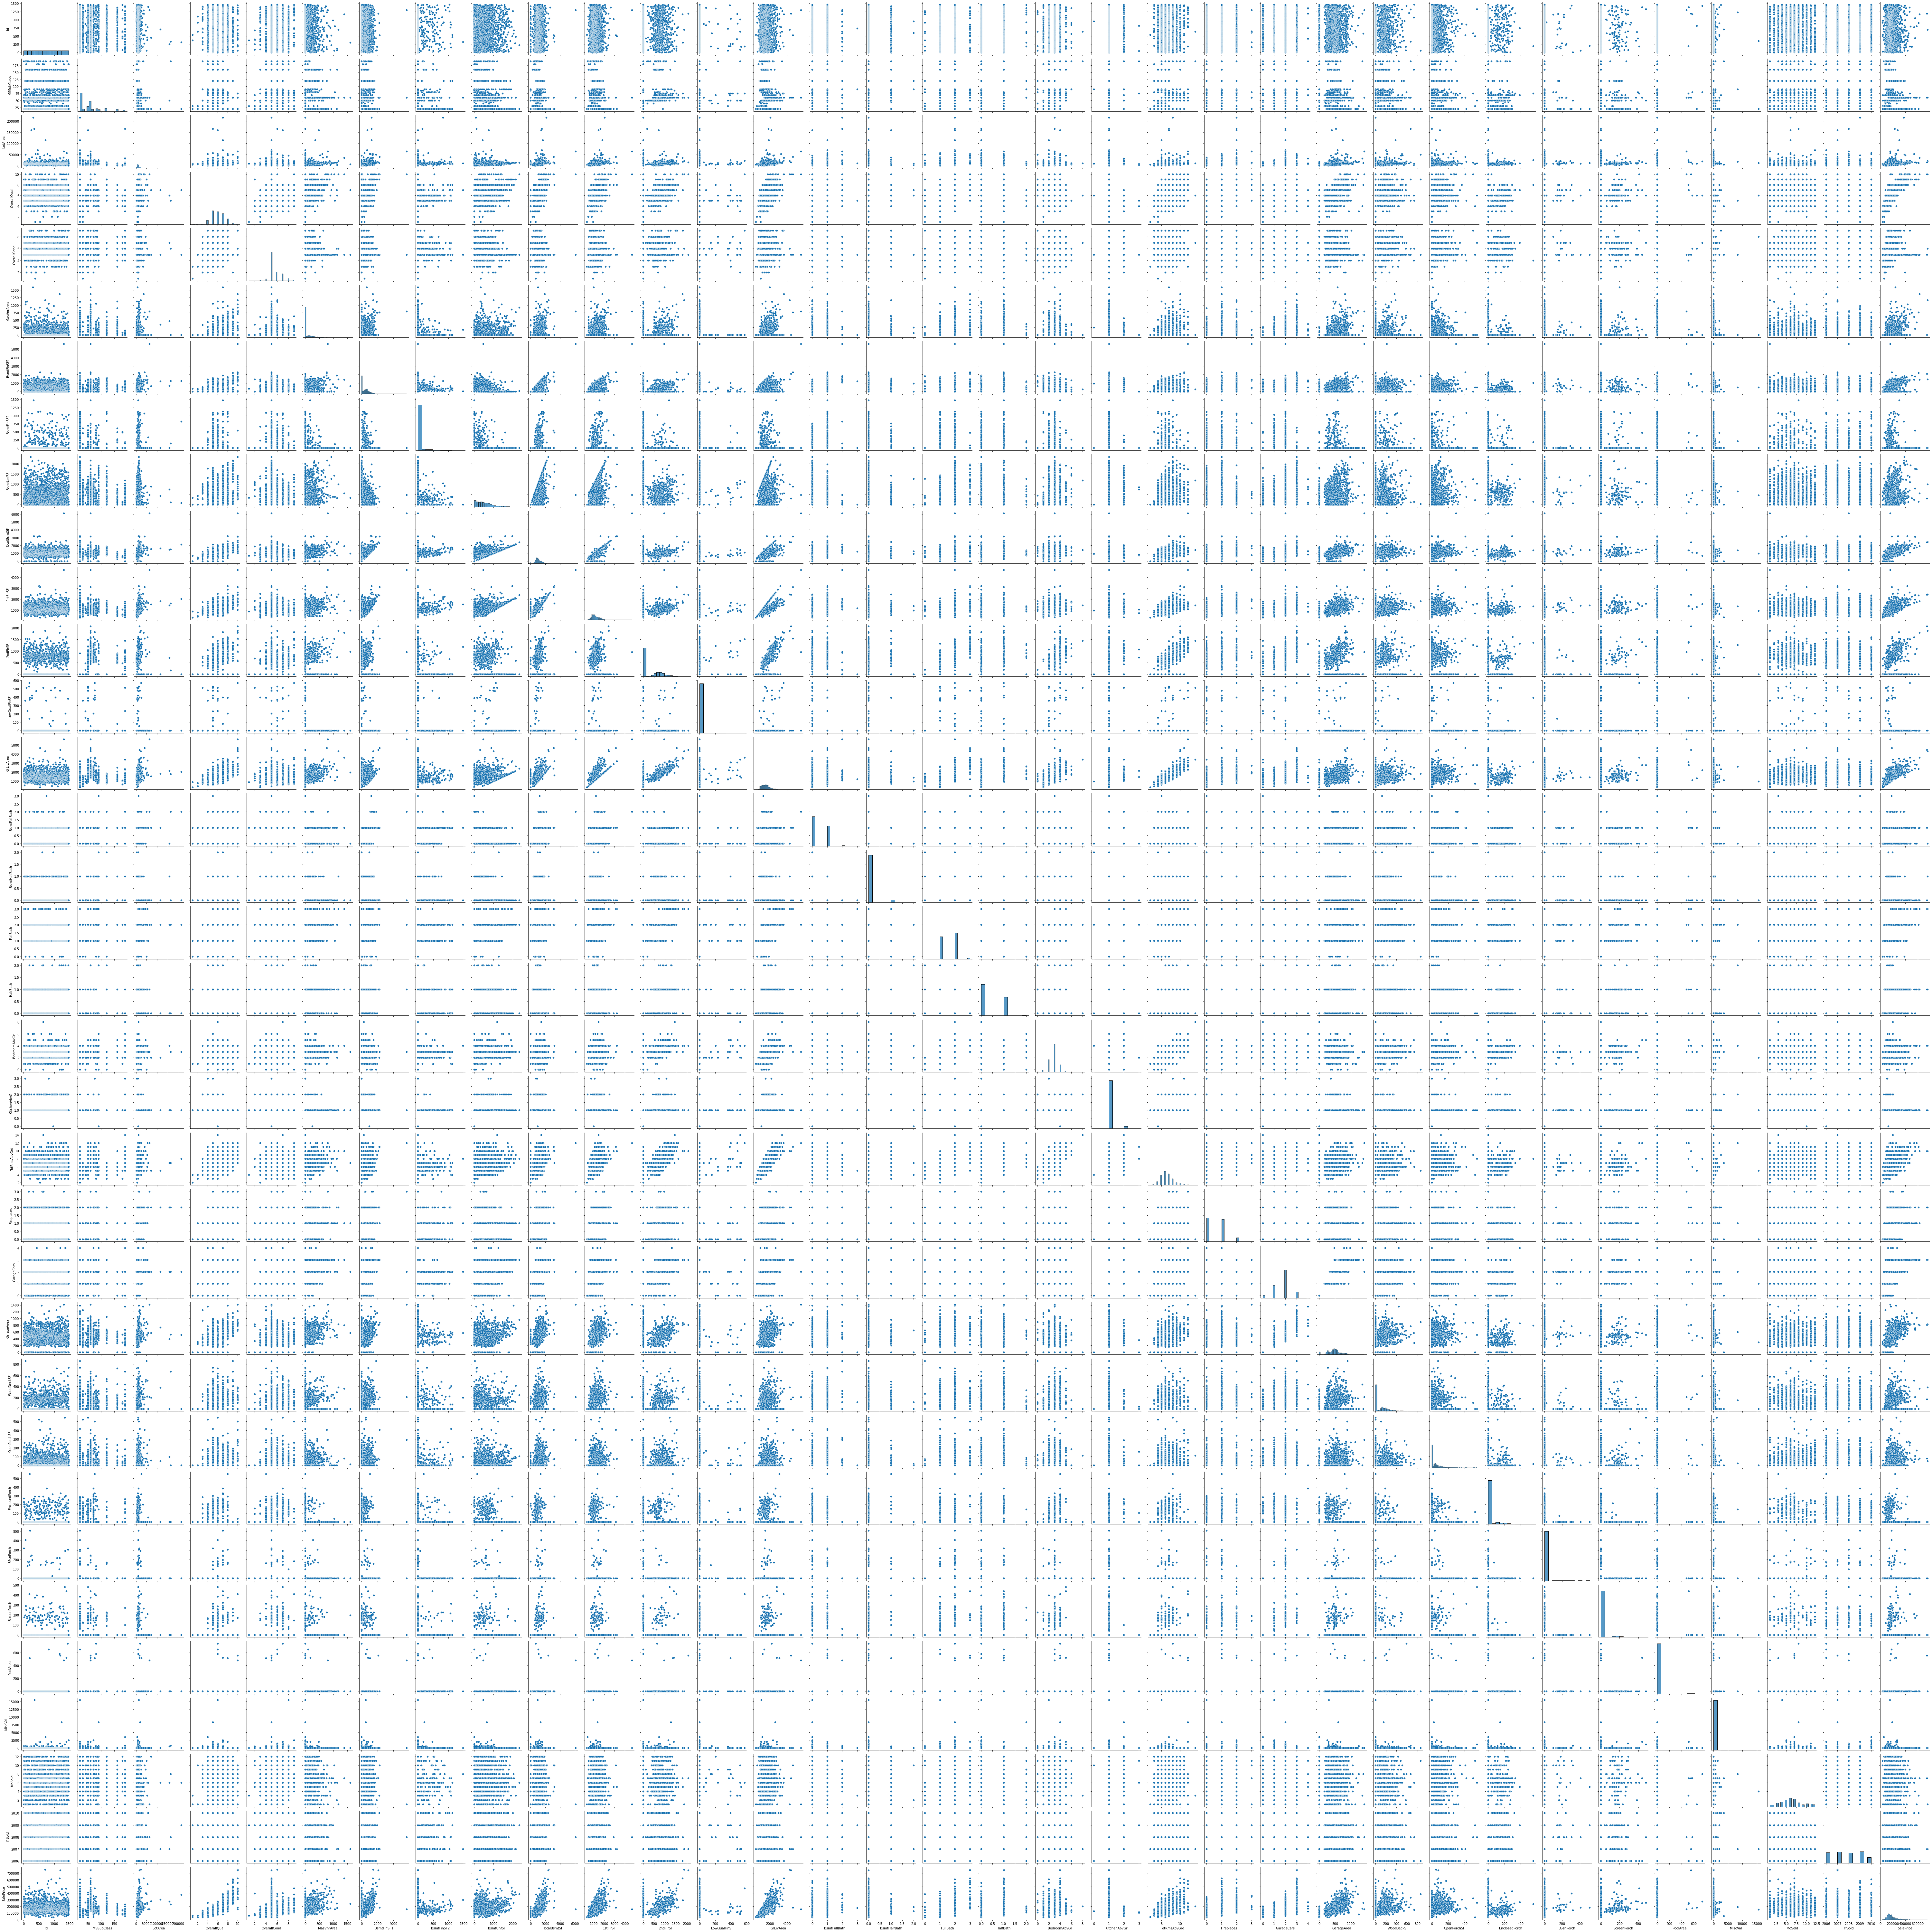

In [29]:
plt.figure(figsize = (15,30))
sns.pairplot(house_data)
plt.show()

### Visualising data to find correlation from numerical variables

<Figure size 1080x2160 with 0 Axes>

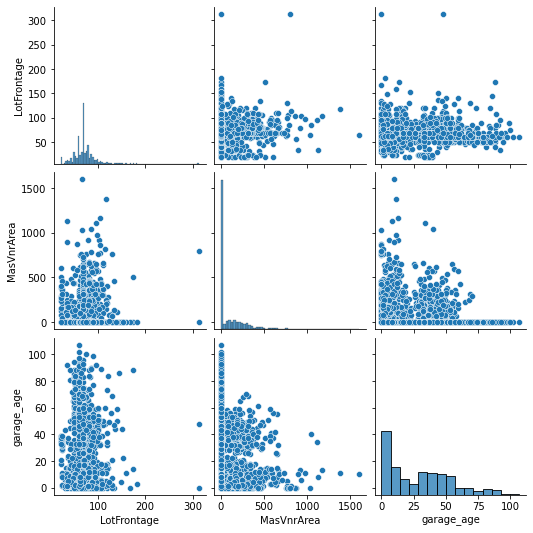

In [191]:
plt.figure(figsize = (15,30))
sns.pairplot(data=df_num)
plt.show()

- So from the above plots we can clearly understand that temp and atemp are having high correlation
- And from the plots we can also say that there is alinear relationship between temp and atemp

#### Visualising categorical Variables



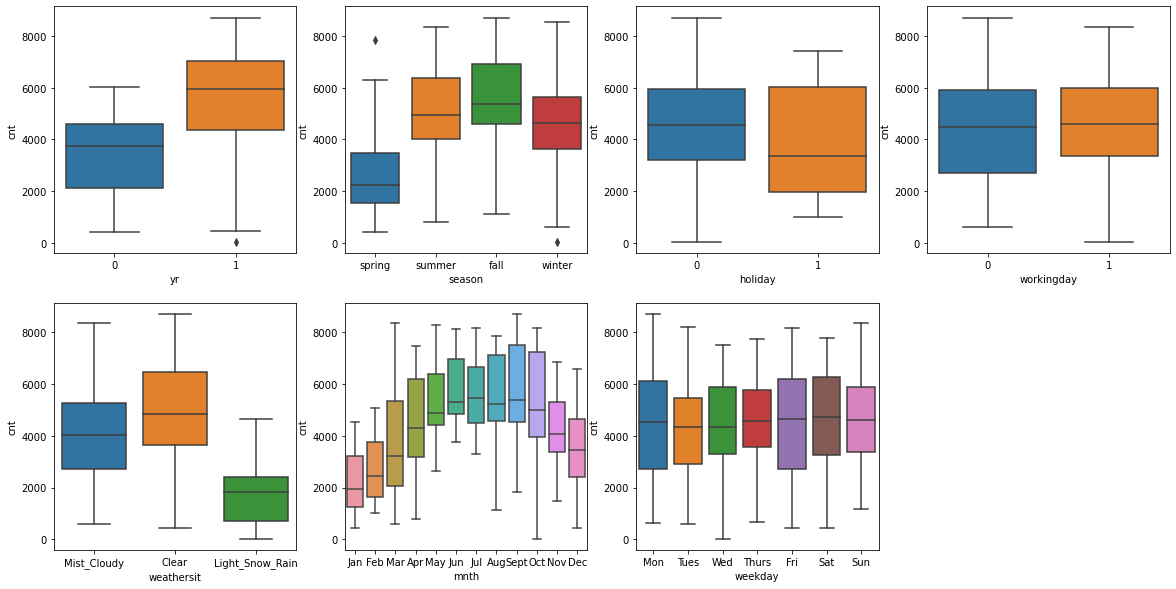

In [418]:
plt.figure(figsize=(20, 10))

plt.subplot(2,4,1)
sns.boxplot(x = 'yr', y = 'cnt', data = house_data)

plt.subplot(2,4,2)
sns.boxplot(x = 'season', y = 'cnt', data = house_data)

plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = house_data)

plt.subplot(2,4,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = house_data)

plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = house_data)

plt.subplot(2,4,6)
sns.boxplot(x = 'mnth', y = 'cnt', data = house_data)

plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'cnt', data = house_data)

plt.show()



In [192]:
# All categorical variables in the dataset
house_data_categorical=house_data.select_dtypes(exclude=['float64','datetime64','int64'])
print(house_data_categorical.columns)

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'CentralAir', 'Electrical', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [193]:
# All numeric variables in the dataset
house_data_numeric = house_data.select_dtypes(include=['float64'])
house_data_numeric.head()

LotFrontage  MasVnrArea  garage_age
0         65.0       196.0         5.0
1         80.0         0.0        31.0
2         68.0       162.0         7.0
3         60.0         0.0         8.0
4         84.0       350.0         8.0

In [138]:
# we can see that numeric data with float64 dataype doenst contain cnt variable. So we will convert cnt
#datatype int64 to float64
house_data['SalesPrice']=house_data['cnt'].astype('SalesPrice')

KeyError: 'cnt'

In [422]:
# All numeric variables in the dataset
house_data_numeric = house_data.select_dtypes(include=['float64'])
house_data_numeric.head()

temp     atemp      hum  windspeed     cnt
0  14.110847  18.18125  80.5833  10.749882   985.0
1  14.902598  17.68695  69.6087  16.652113   801.0
2   8.050924   9.47025  43.7273  16.636703  1349.0
3   8.200000  10.60610  59.0435  10.739832  1562.0
4   9.305237  11.46350  43.6957  12.522300  1600.0


## Segmented Univariate Analysis

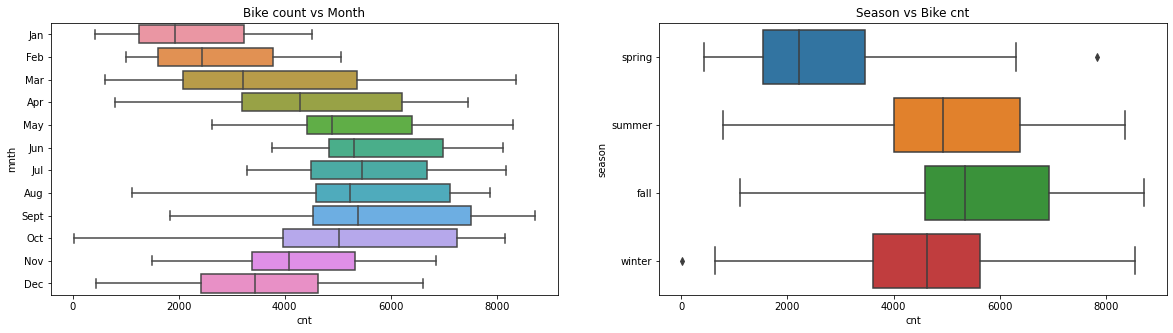

In [423]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='cnt', y=house_data.mnth, data=house_data)
plt.title('Bike count vs Month')
plt.subplot(122)
sns.boxplot(x='cnt', y=house_data.season, data=house_data)
plt.title('Season vs Bike cnt')
plt.show()

### Bivarient Analysis

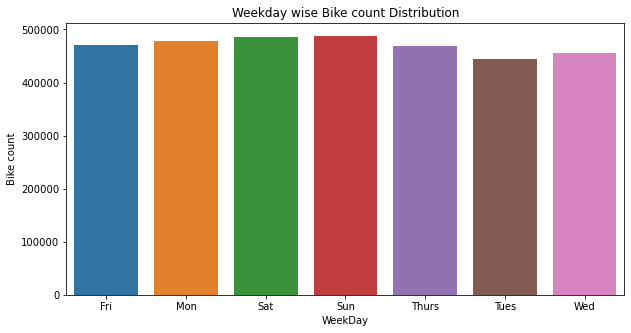

In [424]:
plt.figure(figsize=(10,5))
Month=house_data.groupby("weekday").sum().reset_index()
sns.barplot(x='weekday',y='cnt',data=Month)
plt.xlabel('WeekDay')
plt.ylabel('Bike count')
plt.title('Weekday wise Bike count Distribution')
plt.show()

In [ ]:
# We can see that the demand is almost equally distributed through out the weekdays.

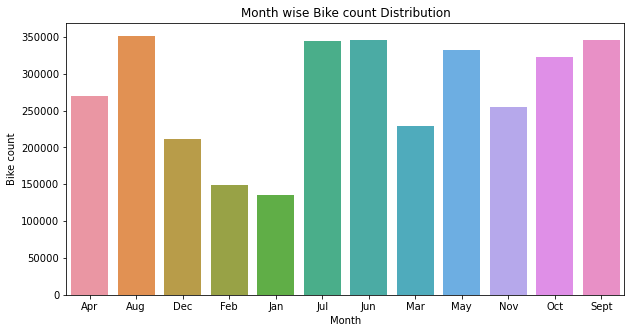

In [241]:
plt.figure(figsize=(10,5))
Month=house_data.groupby("mnth").sum().reset_index()
sns.barplot(x='mnth',y='cnt',data=Month)
plt.xlabel('Month')
plt.ylabel('Bike count')
plt.title('Month wise Bike count Distribution')
plt.show()


In [ ]:
# We can see that Jan, Feb and Dec got less demand of bike rentals. This needs to be analysed and taken care of.

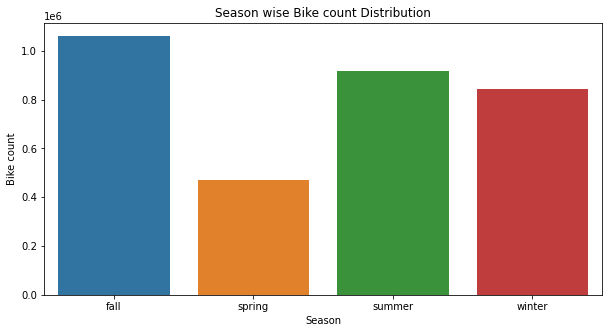

In [242]:
plt.figure(figsize=(10,5))
Season=house_data.groupby("season").sum().reset_index()
sns.barplot(x='season',y='cnt',data=Season)
plt.xlabel('Season')
plt.ylabel('Bike count')
plt.title('Season wise Bike count Distribution')
plt.show()

In [ ]:
#We can see that season spring got less demand of bike rentals. This needs to be taken care off.

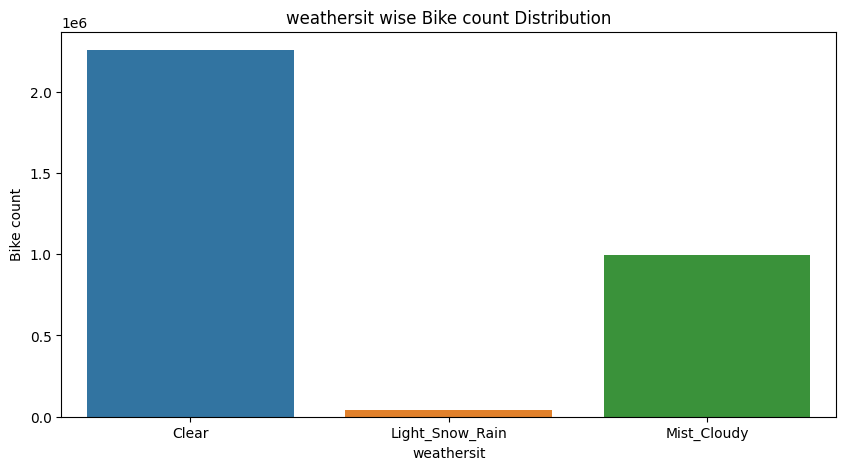

In [ ]:
plt.figure(figsize=(10,5))
weather=house_data.groupby("weathersit").sum().reset_index()
sns.barplot(x='weathersit',y='cnt',data=weather)
plt.xlabel('weathersit')
plt.ylabel('Bike count')
plt.title('weathersit wise Bike count Distribution')
plt.show()

We can see that Light_Snow_Rain weather got a huge impact on the demand of bike, the bike rental count is extremely low in this weather.


<AxesSubplot:xlabel='holiday', ylabel='cnt'>

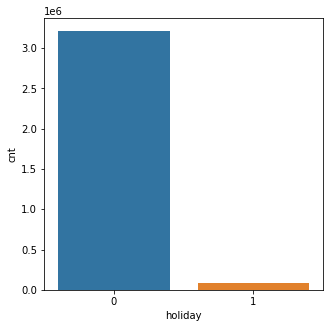

In [ ]:
plt.figure(figsize=(5,5))
Holiday=house_data.groupby("holiday").sum().reset_index()
sns.barplot(x='holiday',y='cnt',data=Holiday)

In [ ]:
# Holidays got an huge imapct on the demand of bike, the rental count is shown very low.

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

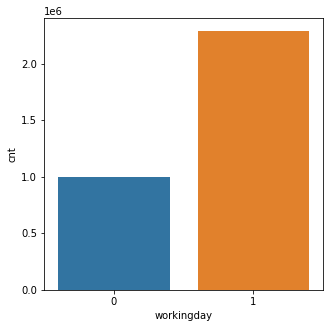

In [ ]:
plt.figure(figsize=(5,5))
workingday=house_data.groupby("workingday").sum().reset_index()
sns.barplot(x='workingday',y='cnt',data=workingday)

In [ ]:
#The demand of bike on working day is very high

# Correlation Analysis using HeatMap

In [96]:
# Correlation matrix
house_data.corr()

Id  LotFrontage   LotArea  OverallQual  OverallCond  \
Id             1.000000    -0.009921 -0.033226    -0.028365     0.012609   
LotFrontage   -0.009921     1.000000  0.304522     0.234812    -0.053281   
LotArea       -0.033226     0.304522  1.000000     0.105806    -0.005636   
OverallQual   -0.028365     0.234812  0.105806     1.000000    -0.091932   
OverallCond    0.012609    -0.053281 -0.005636    -0.091932     1.000000   
YearBuilt     -0.012713     0.116685  0.014228     0.572323    -0.375983   
YearRemodAdd  -0.021998     0.083348  0.013788     0.550684     0.073741   
MasVnrArea    -0.051071     0.178469  0.103321     0.407252    -0.125694   
ExterQual      0.005039     0.165567  0.055570     0.726278    -0.138942   
BsmtFinSF1    -0.005024     0.214367  0.214103     0.239666    -0.046231   
BsmtFinSF2    -0.005968     0.042463  0.111170    -0.059119     0.040229   
BsmtUnfSF     -0.007940     0.124098 -0.002618     0.308159    -0.136841   
TotalBsmtSF   -0.015415     0.363472  0.260833     0.537808    -0.171098   
HeatingQC     -0.015001     0.090051  0.003581     0.457083    -0.014105   
1stFlrSF       0.010496     0.413773  0.299475     0.476224    -0.144203   
2ndFlrSF       0.005590     0.072388  0.050986     0.295493     0.028942   
LowQualFinSF  -0.044230     0.037469  0.004779    -0.030429     0.025494   
GrLivArea      0.008273     0.368007  0.263116     0.593007    -0.079686   
BsmtFullBath   0.002289     0.090343  0.158155     0.111098    -0.054942   
BsmtHalfBath  -0.020155    -0.006979  0.048046    -0.040150     0.117821   
FullBath       0.005587     0.180534  0.126031     0.550600    -0.194149   
HalfBath       0.006784     0.047222  0.014259     0.273458    -0.060769   
BedroomAbvGr   0.037719     0.236840  0.119690     0.101676     0.012980   
KitchenAbvGr   0.002951    -0.004905 -0.017784    -0.183882    -0.087001   
KitchenQual    0.014973     0.169829  0.067864     0.673331    -0.026707   
TotRmsAbvGrd   0.027239     0.320518  0.190015     0.427452    -0.057583   
Fireplaces    -0.019772     0.233221  0.271364     0.396765    -0.023820   
GarageYrBlt    0.000072     0.066497 -0.024947     0.547766    -0.324297   
GarageCars     0.016570     0.269539  0.154871     0.600671    -0.185758   
GarageArea     0.017634     0.323511  0.180403     0.562022    -0.151521   
WoodDeckSF    -0.029643     0.075542  0.171698     0.238923    -0.003334   
OpenPorchSF   -0.000477     0.137014  0.084774     0.308819    -0.032589   
EnclosedPorch  0.002889     0.010287 -0.018340    -0.113937     0.070356   
3SsnPorch     -0.046635     0.061945  0.020423     0.030371     0.025504   
ScreenPorch    0.001330     0.037655  0.043160     0.064886     0.054811   
PoolArea       0.057044     0.180819  0.077672     0.065166    -0.001985   
MiscVal       -0.006242    -0.000255  0.038068    -0.031406     0.068777   
MoSold         0.021172     0.010451  0.001205     0.070815    -0.003511   
YrSold         0.000712     0.006380 -0.014261    -0.027347     0.043950   
SalePrice     -0.021917     0.334771  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  BsmtFinSF1  \
Id             -0.012713     -0.021998   -0.051071   0.005039   -0.005024   
LotFrontage     0.116685      0.083348    0.178469   0.165567    0.214367   
LotArea         0.014228      0.013788    0.103321   0.055570    0.214103   
OverallQual     0.572323      0.550684    0.407252   0.726278    0.239666   
OverallCond    -0.375983      0.073741   -0.125694  -0.138942   -0.046231   
YearBuilt       1.000000      0.592855    0.311600   0.598160    0.249503   
YearRemodAdd    0.592855      1.000000    0.176529   0.587318    0.128451   
MasVnrArea      0.311600      0.176529    1.000000   0.345329    0.261256   
ExterQual       0.598160      0.587318    0.345329   1.000000    0.203777   
BsmtFinSF1      0.249503      0.128451    0.261256   0.203777    1.000000   
BsmtFinSF2     -0.049107     -0.067759   -0.071330  -0.07

<AxesSubplot:>

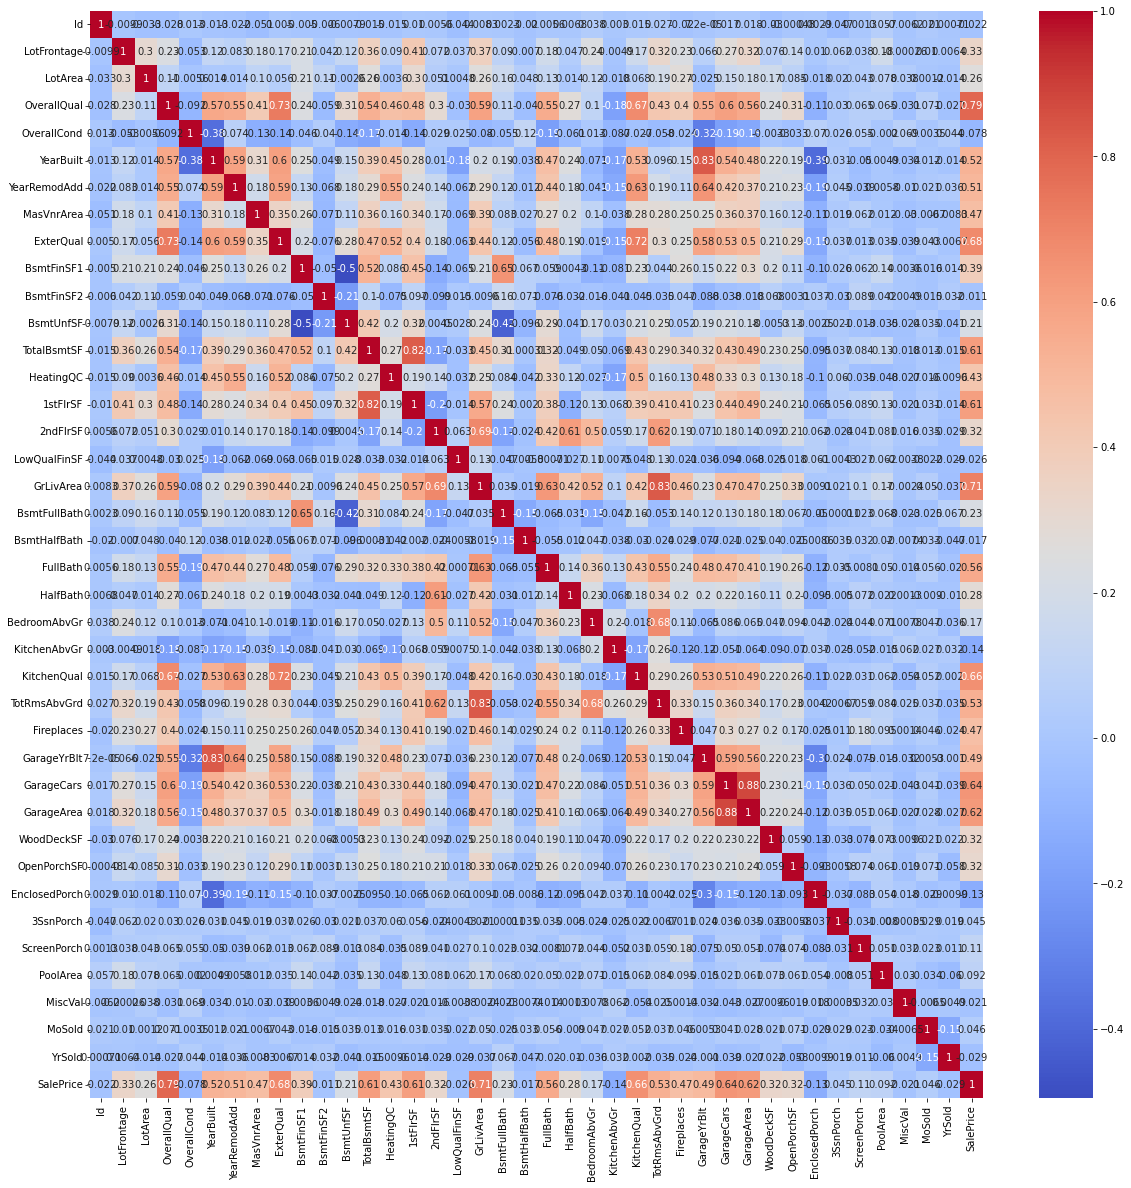

In [99]:
plt.figure(figsize=(20,20))
sns.heatmap(house_data.corr(),cmap="coolwarm",annot=True)


In [54]:
#Data preparation


Correlation betweeen numeric features

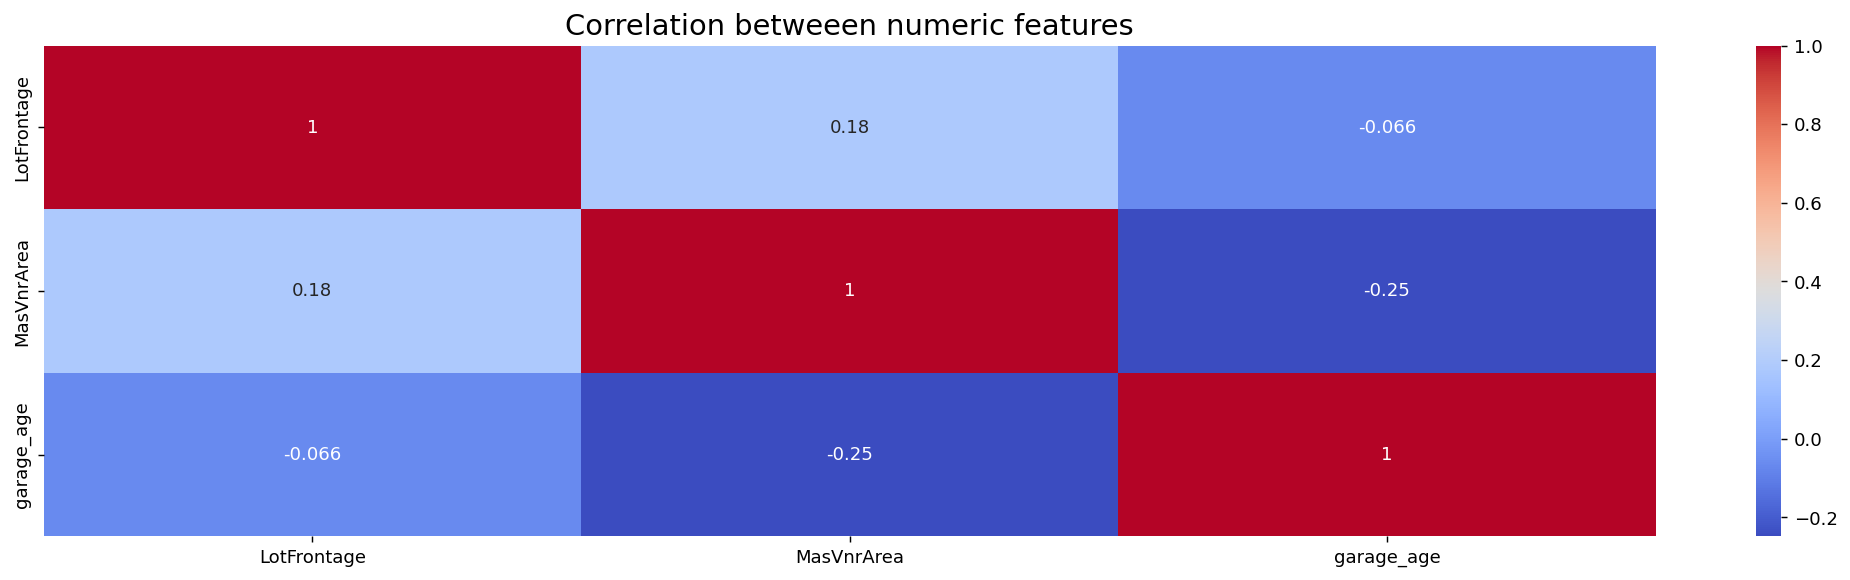

In [194]:

plt.figure(figsize=(20,5),dpi=130)
plt.title("Correlation betweeen numeric features",fontsize=16)
sns.heatmap(df_num.corr(),annot= True,cmap="coolwarm")
plt.show()

Analysis based on heatmap:
Correlation of 'cnt' with independent variables:
- 'cnt' is positively correlated with 'temp' and 'atemp' variable

- Count is negatively correlated to 'windspeed' (-0.24 ). This gives us an impression that the shared bikes demand will be somewhat less on windy days as compared to normal days.


- Count is negatively correlated to 'hum' (-0.099 ). This gives us an impression that the shared bikes demand will be  less on humidity days as compared to normal days.

Correlation among independent variables:
- Some of the independent variables are highly correlated (look at the top-left part of matrix): atemp and temp are highly (positively) correlated. The correlation between the two is almost equal to 1.




## 3. Data Preparation


#### Data Preparation

Let's  prepare the data and build the model.


#### Dummy Variables
The variable `season`,`mnth`,`weekday` and `weathersit` have different levels. We need to convert these levels into integers.

For this, we will use something called `dummy variables`.

In [195]:
house_data_categorical=house_data.select_dtypes(include=['object'])
house_data_categorical.head()

MSSubClass MSZoning Street LotShape LandContour Utilities LotConfig  \
0         60       RL   Pave      Reg         Lvl    AllPub    Inside   
1         20       RL   Pave      Reg         Lvl    AllPub       FR2   
2         60       RL   Pave      IR1         Lvl    AllPub    Inside   
3         70       RL   Pave      IR1         Lvl    AllPub    Corner   
4         60       RL   Pave      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable   
1       Gtl      Veenker      Feedr       Norm     1Fam     1Story     Gable   
2       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable   
3       Gtl      Crawfor       Norm       Norm     1Fam     2Story     Gable   
4       Gtl      NoRidge       Norm       Norm     1Fam     2Story     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType ExterCond Foundation BsmtQual  \
0  CompShg     VinylSd     VinylSd    BrkFace        TA      PConc        4   
1  CompShg     MetalSd     MetalSd       None        TA     CBlock        4   
2  CompShg     VinylSd     VinylSd    BrkFace        TA      PConc        4   
3  CompShg     Wd Sdng     Wd Shng       None        TA     BrkTil        3   
4  CompShg     VinylSd     VinylSd    BrkFace        TA      PConc        4   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating CentralAir  \
0       TA            1            6          Unf    GasA          Y   
1       TA            4            5          Unf    GasA          Y   
2       TA            2            6          Unf    GasA          Y   
3       Gd            1            5          Unf    GasA          Y   
4       TA            3            6          Unf    GasA          Y   

  Electrical Functional   FireplaceQu GarageType GarageFinish GarageQual  \
0      SBrkr        Typ  No Fireplace     Attchd          RFn         TA   
1      SBrkr        Typ             3     Attchd          RFn         TA   
2      SBrkr        Typ             3     Attchd          RFn         TA   
3      SBrkr        Typ             4     Detchd          Unf         TA   
4      SBrkr        Typ             3     Attchd          RFn         TA   

  GarageCond PavedDrive SaleType SaleCondition  
0         TA          Y       WD        Normal  
1         TA          Y       WD        Normal  
2         TA          Y       WD        Normal  
3         TA          Y       WD       Abnorml  
4         TA          Y       WD        Normal

In [102]:
# Convert into dummies
bS_day_dummies = pd.get_dummies(bS_day_categorical, drop_first=True)
bS_day_dummies.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  \
0                1                 0                  0              0   
1                1                 0                  0              1   
2                1                 0                  0              0   
3                1                 0                  0              0   
4                1                 0                  0              1   

   LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
0              0                 1              0              0   
1              0                 0              0              0   
2              0                 1              0              0   
3              0                 0              0              0   
4              0                 0              0              0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     1                     0   
1                     0                     0                     0   
2                     0                     1                     0   
3                     0                     0                     1   
4                     0                     0                     0   

   Neighborhood_

In [104]:
house_data = pd.get_dummies(data=house_data,columns=house_data_categorical.columns,drop_first=True)

house_data.head()

Id  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1         65.0     8450            7            5       2003   
1   2         80.0     9600            6            8       1976   
2   3         68.0    11250            7            5       2001   
3   4         60.0     9550            7            5       1915   
4   5         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  ExterQual  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0          2003       196.0          4         706           0        150   
1          1976         0.0          3         978           0        284   
2          2002       162.0          4         486           0        434   
3          1970         0.0          3         216           0        540   
4          2000       350.0          4         655           0        490   

   TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          856          5       856       854             0       1710   
1         1262          5      1262         0             0       1262   
2          920          5       920       866             0       1786   
3          756          4       961       756             0       1717   
4         1145          5      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   KitchenQual  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
0            4             8           0           2         548           0   
1            3             6           1           2         460         298   
2            4             6           1           2         608           0   
3            4             7           1           3         642           0   
4            4             9           1           3         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  garage_age  remodel_age  MSSubClass_30  \
0       2    2008     208500         5.0            5              0   
1       5    2007     181500        31.0           31              0   
2       9    2008     223500         7.0            6              0   
3       2    2006     140000         8.0           36              0   
4      12    2008     250000         8.0            8              0   

   MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  \
0              0              0              0              1              0   
1              0              0              0              0              0   
2              0              0              0              1              0   
3              0              0              0              0              1   
4              0              0              0              1              0   

   MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  \
0              0              0              0              0               0   
1              0              0              0              0               0   
2              0              0              0              0               0   
3              0       

In [118]:
house_data.columns


Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtFinSF1',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=257)

In [431]:
# we can see that all object variables-categorical variables are converted to 0 and 1 with datatype uint8

## 4. Model Building and Evaluation

Let's start building the model. The first step to model building is the usual test-train split. So let's perform that

### Splitting data into train and test data

### Scaling

We need to scale the variables for better interpretability, only for  the numeric columns and not the dummy variables.

 We can see that the R sqaured model is slowly improving from the initial value 0.409 with addition of each variables.
 But this method is very tedious in the case of large number of variables and adding variables one by one is a very difficult and time consuming process.

In [126]:
# Split the dataframe into train and test sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(house_data, train_size=0.75, test_size=0.25, random_state=50)

In [122]:
np.asarray(df_train) # convert to array

array([[1.1100e+03, 1.0700e+02, 1.1362e+04, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [9.4000e+01, 6.0000e+01, 7.2000e+03, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [8.4100e+02, 6.9000e+01, 1.2155e+04, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       ...,
       [1.3300e+02, 7.5000e+01, 7.3880e+03, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [1.3140e+03, 1.0800e+02, 1.4774e+04, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [1.1000e+02, 1.0500e+02, 1.1751e+04, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00]])

In [127]:

from sklearn.preprocessing import StandardScaler
#instantiate the object
scaler = StandardScaler()

#create list of numeric variables
num_vars = house_data.select_dtypes(include=['float'])

#fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

ValueError: Boolean array expected for the condition, not float64

In [196]:
#instantiate the object
scaler = StandardScaler()

#create list of numeric variables
num_vars = ['LotFrontage','LotArea','OverallQual','OverallCond','YearRemodAdd','MasVnrArea', 'ExterQual', 'BsmtQual'
            , 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'TotalBsmtSF'
           , 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath'
            , 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces'
           , 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'
           , '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'HouseAge']

#fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

KeyError: "['BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'FireplaceQu', 'GarageYrBlt', 'HouseAge'] not in index"

In [821]:
df_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  547.000000  547.000000  547.000000  547.000000  547.000000  547.000000   
mean     0.486289    0.025594    0.700183    0.539238    0.540143    0.643969   
std      0.500269    0.158066    0.458597    0.225899    0.222163    0.147268   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.333364    0.340723    0.528982   
50%      0.000000    0.000000    1.000000    0.538962    0.550315    0.645771   
75%      1.000000    0.000000    1.000000    0.743521    0.730399    0.750751   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt  season_spring  season_summer  ...    mnth_Oct  \
count  547.000000  547.000000     547.000000     547.000000  ...  547.000000   
mean     0.317546    0.510981       0.248629       0.254113  ...    0.084095   
std      0.167984    0.223525       0.432614       0.435760  ...    0.277784   
min      0.000000    0.000000       0.000000       0.000000  ...    0.000000   
25%      0.197183    0.352163       0.000000       0.000000  ...    0.000000   
50%      0.294759    0.519673       0.000000       0.000000  ...    0.000000   
75%      0.406464    0.676254       0.000000       1.000000  ...    0.000000   
max      1.000000    1.000000       1.000000       1.000000  ...    1.000000   

        mnth_Sept  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thurs  \
count  547.000000    547.00000   547.000000   547.000000     547.000000   
mean     0.063985      0.13894     0.144424     0.140768       0.153565   
std      0.244951      0.34620     0.351841     0.348100       0.360861   
min      0.000000      0.00000     0.000000     0.000000       0.000000   
25%      0.000000      0.00000     0.000000     0.000000       0.000000   
50%      0.000000      0.00000     0.000000     0.000000       0.000000   
75%      0.000000      0.00000     0.000000     0.000000       0.000000   
max      1.000000      1.00000     1.000000     1.000000       1.000000   

       weekday_Tues  weekday_Wed  weathersit_Light_Snow_Rain  \
count    547.000000   547.000000                  547.000000   
mean       0.135283     0.148080                    0.029250   
std        0.342339     0.355505                    0.168662   
min        0.000000     0.000000                    0.000000   
25%        0.000000     0.000000                    0.000000   
50%        0.000000     0.000000                    0.000000   
75%        0.000000     0.000000                    0.000000   
max        1.000000     1.000000                    1.000000   

       weathersit_Mist_Cloudy  
count              547.000000  
mean                 0.341865  
std                  0.474769  
min                  0.000000  
25%                  0.000000  
50%                  0.000000  
75%                  1.000000  
max                  1.000000  

[8 rows x 30 columns]

In [822]:
y_train = df_train.pop('cnt')
X_train = df_train

In [823]:
X_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
98    0        0           0  0.353092  0.361592  0.904250   0.189757   
396   1        0           1  0.510926  0.533818  0.523401   0.310919   
175   0        0           0  0.792325  0.777362  0.498067   0.355294   
454   1        0           0  0.454854  0.472056  0.760841   0.444127   
234   0        0           1  0.724830  0.726048  0.469300   0.219363   

     season_spring  season_summer  season_winter  ...  mnth_Oct  mnth_Sept  \
98               0              1              0  ...         0          0   
396              1              0              0  ...         0          0   
175              0              0              0  ...         0          0   
454              0              1              0  ...         0          0   
234              0              0              0  ...         0          0   

     weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thurs  weekday_Tues  \
98             1            0            0              0             0   
396            0            0            0              0             0   
175            1            0            0              0             0   
454            1            0            0              0             0   
234            0            0            0              1             0   

     weekday_Wed  weathersit_Light_Snow_Rain  weathersit_Mist_Cloudy  
98             0                           0                       1  
396            0                           0                       0  
175            0                           0                       0  
454            0                           0                       1  
234            0                           0                       0  

[5 rows x 29 columns]

In [824]:
#scale test set
#scale dftest-numerical variables
df_test[var] = scaler.transform(df_test[var])
# Split the 'df_test' set into X and y after scaling
y_test = df_test.pop('cnt')
X_test = df_test
X_test.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
333   0        0           1  0.331287  0.319837  0.632030   0.488582   
203   0        0           0  0.984424  0.999138  0.515242   0.185727   
279   0        0           1  0.562844  0.585986  0.705024  -0.049804   
483   1        0           0  0.497426  0.511200  0.604980   0.154750   
267   0        0           0  0.716524  0.679992  0.870760   0.010767   

     season_spring  season_summer  season_winter  ...  mnth_Oct  mnth_Sept  \
333              0              0              1  ...         0          0   
203              0              0              0  ...         0          0   
279              0              0              1  ...         1          0   
483              0              1              0  ...         0          0   
267              0              0              1  ...         0          1   

     weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thurs  weekday_Tues  \
333            0            0            0              0             0   
203            1            0            0              0             0   
279            0            0            1              0             0   
483            0            0            0              0             1   
267            0            0            0              0             1   

     weekday_Wed  weathersit_Light_Snow_Rain  weathersit_Mist_Cloudy  
333            0                           0                       0  
203            0                           0                       0  
279            0                           0                       0  
483            0                           0                       0  
267            0                           0                       1  

[5 rows x 29 columns]

### Multiple Linear regression
### Build model using all variables

In [825]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const                         0.269345
yr                            0.229520
holiday                       0.015034
workingday                    0.093630
temp                          0.315665
atemp                         0.118560
hum                          -0.200040
windspeed                    -0.167312
season_spring                -0.068615
season_summer                 0.026426
season_winter                 0.121327
mnth_Aug                      0.020204
mnth_Dec                     -0.066108
mnth_Feb                     -0.028270
mnth_Jan                     -0.053857
mnth_Jul                     -0.006918
mnth_Jun                      0.022663
mnth_Mar                      0.006260
mnth_May                      0.034392
mnth_Nov                     -0.075968
mnth_Oct                     -0.006579
mnth_Sept                     0.081766
weekday_Mon                   0.105085
weekday_Sat                   0.002313
weekday_Sun                   0.011227
weekday_Thurs            

In [826]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     105.2
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          1.26e-193
Time:                        21:14:16   Log-Likelihood:                 563.53
No. Observations:                 547   AIC:                            -1069.
Df Residuals:                     518   BIC:                            -944.2
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2693      0.035      7.739      0.000       0.201       0.338
yr                             0.2295      0.008     29.551      0.000       0.214       0.245
holiday                        0.0150      0.023      0.644      0.520      -0.031       0.061
workingday                     0.0936      0.012      7.778      0.000       0.070       0.117
temp                           0.3157      0.141      2.246      0.025       0.040       0.592
atemp                          0.1186      0.132      0.899      0.369      -0.141       0.378
hum                           -0.2000      0.038     -5.262      0.000      -0.275      -0.125
windspeed                     -0.1673      0.026     -6.559      0.000      -0.217      -0.117
season_spring                 -0.0686      0.029     -2.341      0.020      -0.126      -0.011
season_summer                  0.0264      0.024      1.095      0.274      -0.021       0.074
season_winter                  0.1213      0.029      4.239      0.000       0.065       0.178
mnth_Aug                       0.0202      0.033      0.621      0.535      -0.044       0.084
mnth_Dec                      -0.0661      0.033     -1.975      0.049      -0.132      -0.000
mnth_Feb                      -0.0283      0.032     -0.879      0.380      -0.091       0.035
mnth_Jan                      -0.0539      0.033     -1.614      0.107      -0.119       0.012
mnth_Jul                      -0.0069      0.033     -0.207      0.836      -0.073       0.059
mnth_Jun                       0.0227      0.024      0.938      0.349      -0.025       0.070
mnth_Mar                       0.0063      0.025      0.247      0.805      -0.044       0.056
mnth_May                       0.0344      0.020      1.714      0.087      -0.005       0.074
mnth_Nov                      -0.0760      0.036     -2.093      0.037      -0.147      -0.005
mnth_Oct                      -0.0066      0.035     -0.186      0.852      -0.076       0.063
mnth_Sept                      0.0818      0.031      2.631      0.009       0.021       0.143
weekday_Mon                    0.1051      0.014      7.734      0.000       0.078       0.132
weekday_Sat                    0.0023      0.014      0.161      0.872      -0.026       0.031
weekday_Sun                    0.0112      0.015      0.770      0.442      -0.017       0.040
weekday_Thurs                 -0.0060      0.014     -0.421      0.674      -0.034       0.022
weekday_Tues                   0.0556      0.013      4.144      0.000       0.029       0.082
weekday_Wed                   -0.0147      0.015     -1.011      0.313      -0.043       0.014
weathersit_Light_Snow_Rain    -0.2125      0.026     -8.169      0.000      -0.264      -0.161
weathersit_Mist_Cloudy        -0.0451      

#### Calculate VIF to identfy collinearity with variables

In [827]:
df1 = X_train
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                      Features    VIF
2                   workingday  92.77
3                         temp  69.85
4                        atemp  59.56
21                 weekday_Mon  18.35
25                weekday_Tues  17.70
7                season_spring  11.14
9                season_winter  10.52
8                season_summer   7.66
18                    mnth_Nov   7.05
19                    mnth_Oct   6.66
11                    mnth_Dec   6.34
10                    mnth_Aug   6.00
14                    mnth_Jul   5.76
13                    mnth_Jan   5.60
12                    mnth_Feb   5.20
1                      holiday   4.67
20                   mnth_Sept   4.02
16                    mnth_Mar   3.78
15                    mnth_Jun   3.19
17                    mnth_May   2.49
5                          hum   2.17
26                 weekday_Wed   1.85
24               weekday_Thurs   1.82
23                 weekday_Sun   1.79
22                 weekday_Sat   1.77
28      weat

In [828]:
#temp and atemp is highly correlated.
#VIF of temp and atemp is high
#VIF of workig day is high
#pvlue of temp is low where atemp is higher than temp
#so we avoid/ remove atemp and build the model again


 In this method we have t remove variables one by one based on its pvalue and VIF value.
In order to understand which variables are more significant or not, we can use RFE whether the variables have positive or negative support gainst the cnt variable

###  Model building using sklearn library

In [829]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [830]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 2.29520287e-01  1.72802527e+12  1.72802527e+12  2.76526997e-01
  1.44708217e-01 -2.19886129e-01 -1.81895142e-01 -6.56594410e-02
  2.25855134e-02  1.38981040e-01  1.90831791e-02 -9.40892463e-02
 -3.67191567e-02 -7.11749918e-02 -1.44958329e-02  6.49051467e-03
 -1.07475557e-02  3.73096897e-02 -1.08336345e-01 -3.66139472e-02
  8.28481464e-02  1.72802527e+12  5.72580621e-04  1.02744145e-02
  4.64531414e-04  1.72802527e+12 -1.33247218e-02 -2.06344869e-01
 -4.45461722e-02]
-1728025273718.7205


#### Model Building Using RFE

Now, you have close to 28 features. It is obviously not recommended to manually eliminate these features. So let's now build a model using recursive feature elimination to select features. We'll first start off with an arbitrary number of features (15 seems to be a good number to begin with), and then use the `statsmodels` library to build models using the shortlisted features (this is also because `SKLearn` doesn't have `Adjusted R-squared` that `statsmodels` has).

In [871]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(lm,n_features_to_select= 10)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)
print(rfe1.ranking_)

[ True  True False  True  True  True  True  True False  True False False
 False False False False False False False False  True False False False
 False False False  True False]
[ 1  1  8  1  1  1  1  1 11  1 12  3  9  4 17 13 18  6  2 16  1  7 19 15
 20 10 14  1  5]


In [872]:
X_train.columns[ rfe1.support_]

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Sept', 'weathersit_Light_Snow_Rain'],
      dtype='object')

In [873]:
#List of variables selected in top 15 list
list(zip(X_train.columns,rfe1.support_,rfe1.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 11),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 12),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 9),
 ('mnth_Jan', False, 4),
 ('mnth_Jul', False, 17),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 18),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 16),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', False, 7),
 ('weekday_Sat', False, 19),
 ('weekday_Sun', False, 15),
 ('weekday_Thurs', False, 20),
 ('weekday_Tues', False, 10),
 ('weekday_Wed', False, 14),
 ('weathersit_Light_Snow_Rain', True, 1),
 ('weathersit_Mist_Cloudy', False, 5)]

In [874]:
#Lets select the rfe support columns to build the model
X_train_rfe_col_1=X_train.columns[ rfe1.support_]

X_train_rfe_col_1

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Sept', 'weathersit_Light_Snow_Rain'],
      dtype='object')

In [876]:
X_train.columns[ ~rfe1.support_]

Index(['workingday', 'season_summer', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thurs', 'weekday_Tues', 'weekday_Wed',
       'weathersit_Mist_Cloudy'],
      dtype='object')

In [877]:
# dataframe with RFE selected variables
X_train_rfe_1 = X_train[X_train_rfe_col_1]

### Define functions to simplify the model building with reusability of code

In [878]:
#  function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [863]:
#Function to build a model using statsmodel api which takes columns as the parameter return the model object-lr
def create_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lr = sm.OLS(y_train, X_train_sm).fit()
    print(lr.summary())
    return lr


In [864]:
#Function to calculate vif and analyse with pvalues- which takes parameters columns and model object lr
def Analyze_model_with_VIF(cols,lr):

    df1 =X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    #print(vif.sort_values(by='VIF',ascending=False))

    # Get p-values from the model summary
    summary = lr.summary()
    p_values = pd.DataFrame(summary.tables[1].data, columns=["Features", "Coef", "Std Err", "t", "P-Value", "Conf","Interval"])


    #p_values = p_values.iloc[1:, [0, 4]]  # Select only Feature_Variable and P-Value columns and remove the header row
    p_values = p_values.iloc[1:, [0, 1,4]]  # Select only Feature_Variable and P-Value columns and remove the header row
    # Merge VIF and P-Value dataframes
    vif_p_values_df = pd.merge(vif, p_values, on="Features")
    
    # Sort the filtered table by low p-values and low VIF
    sorted_table = vif_p_values_df.sort_values(by=["P-Value", "VIF"], ascending=[True, True])

    print(sorted_table)

In [865]:
#Function to calculate RFE- which takes paarmeters X_dataframe,y_dataframe & n_feature
def calculate_RFE(X_dataframe,y_dataframe,n_features):

    rfe1 = RFE(lm,n_features_to_select= n_features)

    rfe1.fit(X_dataframe, y_dataframe)
    #print("RFE Support Variables:",X_train.columns[rfe1.support_])

    # Create a DataFrame to display the results
    #result_df = pd.DataFrame({'Features': X_train.columns, 'RFE Support': rfe1.support_})
    supported_rankings = [rfe1.ranking_[i] for i, support in enumerate(rfe1.support_) if support]

    result_df = pd.DataFrame({'Features': X_train.columns[rfe1.support_], 'RFE Ranking':  supported_rankings})
    #print(result_df)
    return X_train.columns[rfe1.support_]

### Build Model I

In [879]:
calculateVIF(X_train_rfe_1)


Features     VIF
3                       atemp  379.85
2                        temp  374.20
4                         hum   15.10
5                   windspeed    4.12
6               season_spring    2.50
7               season_winter    2.01
0                          yr    1.96
9  weathersit_Light_Snow_Rain    1.13
8                   mnth_Sept    1.12
1                     holiday    1.04

In [880]:
# lets remove 'atemp' since it has got highest VIF value-high multiillinearity with temp value.

X_train_rfe_1=X_train_rfe_1.drop(['atemp'],axis=1)
lr=create_model(X_train_rfe_1.columns)
Analyze_model_with_VIF(X_train_rfe_1.columns,lr)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     288.2
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          3.66e-199
Time:                        21:18:35   Log-Likelihood:                 526.10
No. Observations:                 547   AIC:                            -1032.
Df Residuals:                     537   BIC:                            -989.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [881]:
# lets remove 'hum' since it has got highest VIF value

X_train_rfe_1=X_train_rfe_1.drop(['hum'],axis=1)
lr=create_model(X_train_rfe_1.columns)
Analyze_model_with_VIF(X_train_rfe_1.columns,lr)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     270.9
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          3.47e-183
Time:                        21:18:37   Log-Likelihood:                 485.62
No. Observations:                 547   AIC:                            -953.2
Df Residuals:                     538   BIC:                            -914.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [890]:
# lets remove 'mnth_Sept' since it has got less coefficient

X_train_rfe_1=X_train_rfe_1.drop(['mnth_Sept'],axis=1)
lr=create_model(X_train_rfe_1.columns)
Analyze_model_with_VIF(X_train_rfe_1.columns,lr)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     304.1
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          1.32e-182
Time:                        21:22:21   Log-Likelihood:                 481.31
No. Observations:                 547   AIC:                            -946.6
Df Residuals:                     539   BIC:                            -912.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [891]:
# lets remove 'season_winter' since it has got less coefficient

X_train_rfe_1=X_train_rfe_1.drop(['season_winter'],axis=1)
lr=create_model(X_train_rfe_1.columns)
Analyze_model_with_VIF(X_train_rfe_1.columns,lr)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     345.4
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          3.33e-181
Time:                        21:22:24   Log-Likelihood:                 475.01
No. Observations:                 547   AIC:                            -936.0
Df Residuals:                     540   BIC:                            -905.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Here we can see thet the pvalues and VIF of variables are normalized and we can conclude this as model outcome.

We can see that mnth_sept is correlated with variable 'temp' and we can remove mnth_sep to avoid multicollinearity


<AxesSubplot:>

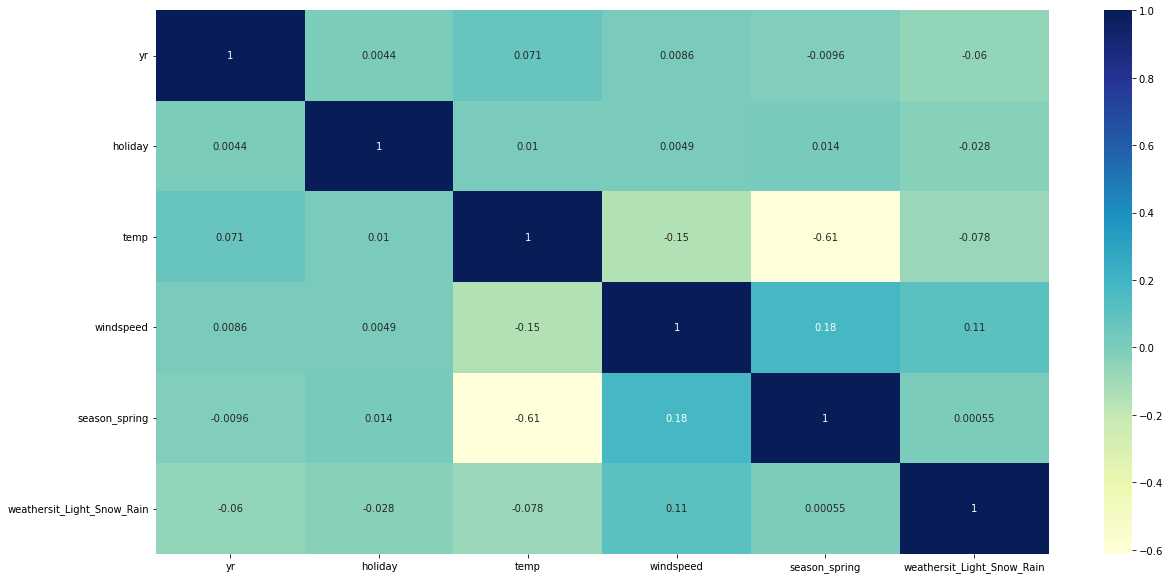

In [892]:
#check correlation between variables

plt.figure(figsize=(20,10))
sns.heatmap(X_train_rfe_1.corr(),annot=True,cmap='YlGnBu')

Now we got a heatmap with decent correlation with variables and it is good to go

### Residual Analysis-Model I

Before we make predictions on the test set, let's first analyse the residuals.

In [893]:
# Subsetting training data for 10 selected columns
X_train_sm_1 = X_train[X_train_rfe_1.columns]

# Add a constant to the model
X_train_sm_1 = sm.add_constant(X_train_sm_1)
lr_train_model_1=sm.OLS(y_train, X_train_sm_1).fit()
print(lr_train_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     345.4
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          3.33e-181
Time:                        21:22:31   Log-Likelihood:                 475.01
No. Observations:                 547   AIC:                            -936.0
Df Residuals:                     540   BIC:                            -905.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [894]:
y_train_pred_1 = lr.predict(X_train_sm_1)

In [895]:

#Plot a histogram of the error terms
def plot__train_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')






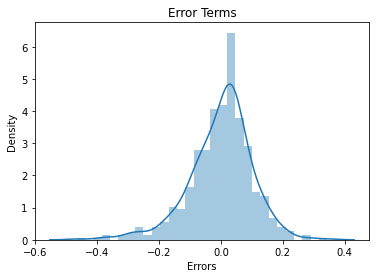

In [896]:
plot__train_res_dist(y_train, y_train_pred_1)

In [897]:
print(r2_score(y_train,y_train_pred_1))

0.7932754624941712


In [898]:
X_test_sm_1=X_test[X_train_rfe_1.columns]
X_test_sm_1 = sm.add_constant(X_test_sm_1)
lr_test_model_1=sm.OLS(y_test, X_test_sm_1).fit()

lr_test_model_1.params
lr_test_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     100.8
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           2.82e-54
Time:                        21:22:43   Log-Likelihood:                 154.02
No. Observations:                 183   AIC:                            -294.0
Df Residuals:                     176   BIC:                            -271.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.3000      0.035      8.477      0.000       0.230       0.370
yr                             0.2509      0.016     15.771      0.000       0.220       0.282
holiday                       -0.0685      0.041     -1.657      0.099      -0.150       0.013
temp                           0.3245      0.044      7.344      0.000       0.237       0.412
windspeed                     -0.1159      0.049     -2.375      0.019      -0.212      -0.020
season_spring                 -0.1707      0.024     -7.035      0.000      -0.219      -0.123
weathersit_Light_Snow_Rain    -0.2350      0.050     -4.746      0.000      -0.333      -0.137
==============================================================================
Omnibus:                        5.757   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                5.716
Skew:                          -0.433   Prob(JB):                       0.0574
Kurtosis:                       2.997   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [899]:
# Making predictions
y_test_pred_1 = lr.predict(X_test_sm_1)

Text(0, 0.5, 'y_test_pred_1')

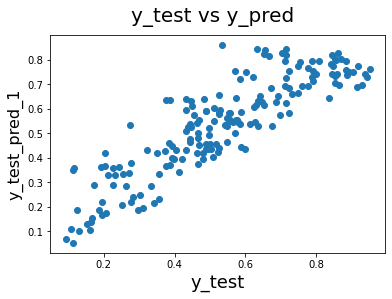

In [900]:

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred_1)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred_1', fontsize = 16)

In [901]:
print(r2_score(y_test,y_test_pred_1))

0.7693471233333826


Thus, for the model with 6 variables, the r2_score  on training and test data is about 79.3% and 76.9% respectively. 
The adjusted r-squared on the test set is about is about 76.7%.

# Model II-RFE(15)

In [902]:

cols=  calculate_RFE(X_train,y_train,15) #call function to get the rfe support variables
X_train_rfe_2=X_train[cols]

In [903]:

lr=create_model(X_train_rfe_2.columns) # call function to create model
Analyze_model_with_VIF(X_train_rfe_2.columns,lr) # call function to nalyse VIF vaalue with pvalue of feature variables

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.0
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          1.30e-201
Time:                        21:25:14   Log-Likelihood:                 548.93
No. Observations:                 547   AIC:                            -1066.
Df Residuals:                     531   BIC:                            -997.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [904]:
# lets remove 'atemp' since it has got highest VIF value because of multicollinearity. so lets remove 'atemp'

X_train_rfe_2=X_train_rfe_2.drop(['atemp'],axis=1)
lr=create_model(X_train_rfe_2.columns)
Analyze_model_with_VIF(X_train_rfe_2.columns,lr)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.6
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          1.16e-202
Time:                        21:25:17   Log-Likelihood:                 548.66
No. Observations:                 547   AIC:                            -1067.
Df Residuals:                     532   BIC:                            -1003.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [905]:
# lets remove 'hum' since it has got highest VIF value

X_train_rfe_2=X_train_rfe_2.drop(['hum'],axis=1)
lr=create_model(X_train_rfe_2.columns)
Analyze_model_with_VIF(X_train_rfe_2.columns,lr)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     204.2
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          3.02e-197
Time:                        21:25:20   Log-Likelihood:                 533.02
No. Observations:                 547   AIC:                            -1038.
Df Residuals:                     533   BIC:                            -977.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

<AxesSubplot:>

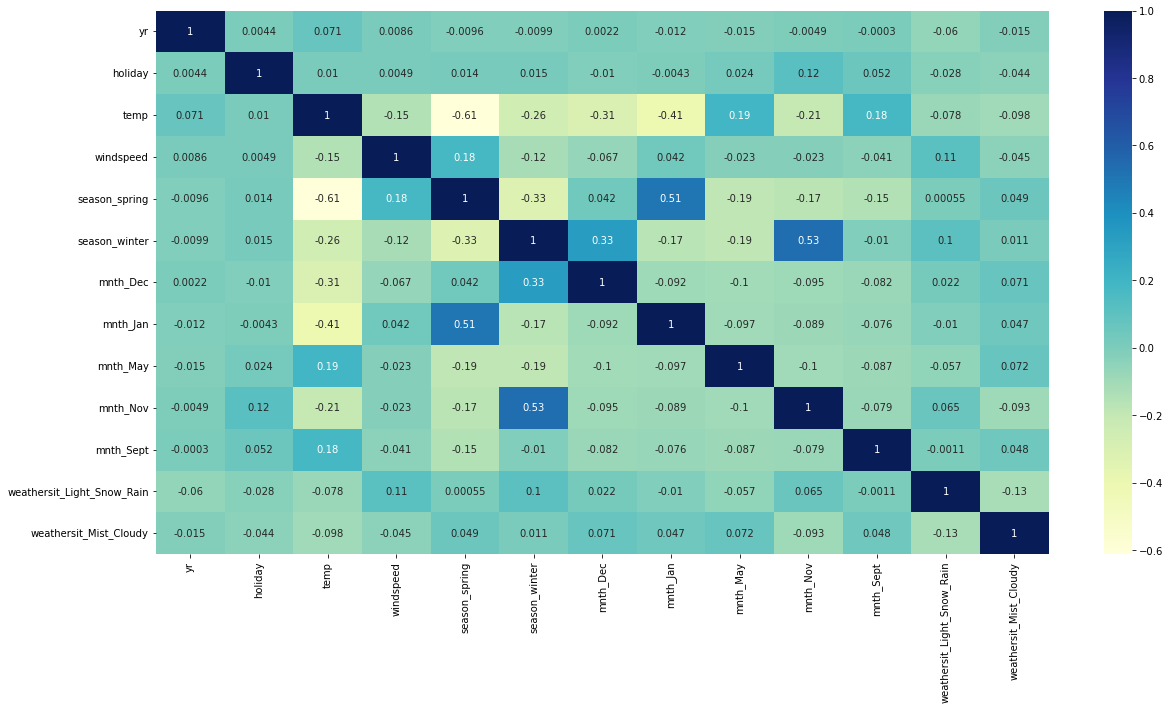

In [907]:
#check the correlation with variables

plt.figure(figsize=(20,10))
sns.heatmap(X_train_rfe_2.corr(),annot=True,cmap='YlGnBu')

In [ ]:
# we can see that month of November is correlated with season_winter and
#also we can see that month jan and season_spring is correlated
#also we can see that month Dec and season_winter is correlated
#This will cause multicillinearity and we have to remove it.

In [908]:
X_train_rfe_2=X_train_rfe_2.drop(['mnth_Nov'],axis=1)
lr=create_model(X_train_rfe_2.columns)
Analyze_model_with_VIF(X_train_rfe_2.columns,lr)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     213.8
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          5.51e-195
Time:                        21:25:33   Log-Likelihood:                 524.87
No. Observations:                 547   AIC:                            -1024.
Df Residuals:                     534   BIC:                            -967.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [909]:
X_train_rfe_2=X_train_rfe_2.drop(['mnth_Jan'],axis=1)
lr=create_model(X_train_rfe_2.columns)
Analyze_model_with_VIF(X_train_rfe_2.columns,lr)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     230.5
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          7.15e-195
Time:                        21:25:36   Log-Likelihood:                 521.78
No. Observations:                 547   AIC:                            -1020.
Df Residuals:                     535   BIC:                            -967.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [910]:
# mnth_Dec is correlated with season_winter,so lets remove it
X_train_rfe_2=X_train_rfe_2.drop(['mnth_Dec'],axis=1)
lr=create_model(X_train_rfe_2.columns)
Analyze_model_with_VIF(X_train_rfe_2.columns,lr)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     251.9
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          2.85e-195
Time:                        21:25:40   Log-Likelihood:                 519.86
No. Observations:                 547   AIC:                            -1018.
Df Residuals:                     536   BIC:                            -970.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [911]:
# mnth_May is correlated with variable temp, so lets remove it

X_train_rfe_2=X_train_rfe_2.drop(['mnth_May'],axis=1)
lr=create_model(X_train_rfe_2.columns)
Analyze_model_with_VIF(X_train_rfe_2.columns,lr)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     278.6
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          6.97e-196
Time:                        21:25:46   Log-Likelihood:                 518.39
No. Observations:                 547   AIC:                            -1017.
Df Residuals:                     537   BIC:                            -973.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

We can see that now the variables have normalized with VIF and pvalues.

<AxesSubplot:>

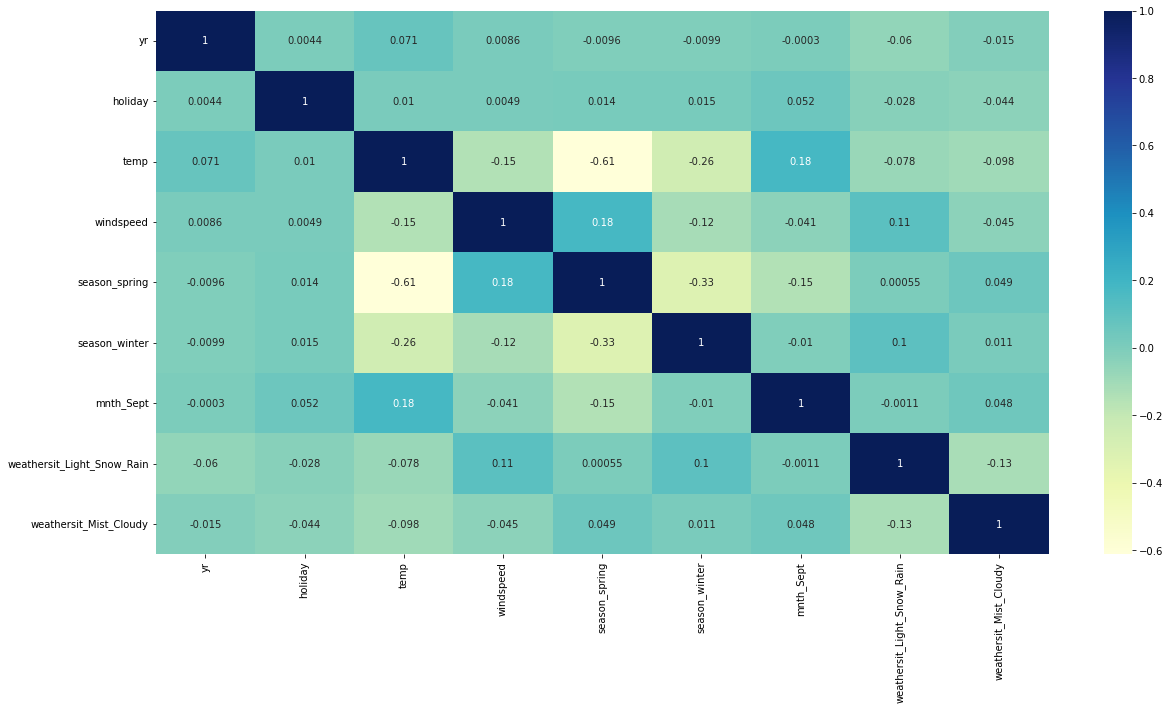

In [913]:
#check the correlation between variables
plt.figure(figsize=(20,10))
sns.heatmap(X_train_rfe_2.corr(),annot=True,cmap='YlGnBu')

Now we can see that the correlation between variables are very low. So we can proceed with this model.

In [914]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train[X_train_rfe_2.columns], y_train)

LinearRegression()

In [915]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 0.23276567 -0.09983187  0.42705551 -0.12064276 -0.12174391  0.04547586
  0.06210238 -0.26821364 -0.07190572]
0.25595259028605366


### Residual Analysis

Before we make predictions on the test set, let's first analyse the residuals.

In [916]:
# Subsetting training data for 10 selected columns
X_train_sm_2 = X_train[X_train_rfe_2.columns]

# Add a constant to the model
X_train_sm_2 = sm.add_constant(X_train_sm_2)
lr_train_model_2=sm.OLS(y_train, X_train_sm_2).fit()
print(lr_train_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     278.6
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          6.97e-196
Time:                        21:31:18   Log-Likelihood:                 518.39
No. Observations:                 547   AIC:                            -1017.
Df Residuals:                     537   BIC:                            -973.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [917]:
y_train_pred_2 = lr.predict(X_train_sm_2)


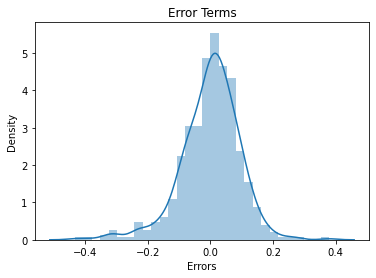

In [919]:
#Plot a histogram of the error terms
plot__train_res_dist(y_train, y_train_pred_2)

The error terms are fairly normally distributed and we can surely live with this. Let's now make predictions on the test-set.

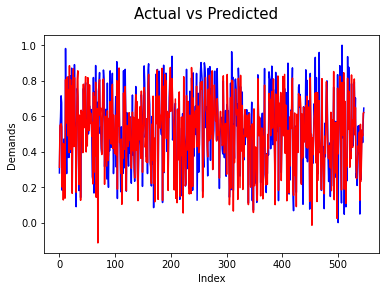

In [920]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred_2, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

# Prediction on Trained Model

Evaluate R-sqaured value

In [921]:
r2_score(y_train,y_train_pred_2)

0.8235946120283087

In [922]:
X_test.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
333   0        0           1  0.331287  0.319837  0.632030   0.488582   
203   0        0           0  0.984424  0.999138  0.515242   0.185727   
279   0        0           1  0.562844  0.585986  0.705024  -0.049804   
483   1        0           0  0.497426  0.511200  0.604980   0.154750   
267   0        0           0  0.716524  0.679992  0.870760   0.010767   

     season_spring  season_summer  season_winter  ...  mnth_Oct  mnth_Sept  \
333              0              0              1  ...         0          0   
203              0              0              0  ...         0          0   
279              0              0              1  ...         1          0   
483              0              1              0  ...         0          0   
267              0              0              1  ...         0          1   

     weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thurs  weekday_Tues  \
333            0            0            0              0             0   
203            1            0            0              0             0   
279            0            0            1              0             0   
483            0            0            0              0             1   
267            0            0            0              0             1   

     weekday_Wed  weathersit_Light_Snow_Rain  weathersit_Mist_Cloudy  
333            0                           0                       0  
203            0                           0                       0  
279            0                           0                       0  
483            0                           0                       0  
267            0                           0                       1  

[5 rows x 29 columns]

In [923]:
X_test_sm_2=X_test[X_train_rfe_2.columns]
X_test_sm_2 = sm.add_constant(X_test_sm_2)
lr_model_test_2=sm.OLS(y_test, X_test_sm_2).fit()

lr_model_test_2.params

const                         0.272486
yr                            0.250588
holiday                      -0.057014
temp                          0.339709
windspeed                    -0.061965
season_spring                -0.142878
season_winter                 0.058570
mnth_Sept                     0.073613
weathersit_Light_Snow_Rain   -0.293086
weathersit_Mist_Cloudy       -0.083270
dtype: float64

In [924]:
lr_model_test_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     88.98
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           3.53e-60
Time:                        21:31:54   Log-Likelihood:                 175.82
No. Observations:                 183   AIC:                            -331.6
Df Residuals:                     173   BIC:                            -299.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2725      0.040      6.841      0.000       0.194       0.351
yr                             0.2506      0.014     17.578      0.000       0.222       0.279
holiday                       -0.0570      0.037     -1.538      0.126      -0.130       0.016
temp                           0.3397      0.046      7.410      0.000       0.249       0.430
windspeed                     -0.0620      0.045     -1.367      0.173      -0.151       0.027
season_spring                 -0.1429      0.026     -5.576      0.000      -0.193      -0.092
season_winter                  0.0586      0.020      2.912      0.004       0.019       0.098
mnth_Sept                      0.0736      0.022      3.376      0.001       0.031       0.117
weathersit_Light_Snow_Rain    -0.2931      0.045     -6.473      0.000      -0.382      -0.204
weathersit_Mist_Cloudy        -0.0833      0.015     -5.404      0.000      -0.114      -0.053
==============================================================================
Omnibus:                       16.319   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.249
Skew:                          -0.680   Prob(JB):                     0.000109
Kurtosis:                       3.737   Cond. No.                         13.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [925]:
# Making predictions
y_test_pred_2 = lr.predict(X_test_sm_2)

Text(0, 0.5, 'y_test_pred_2')

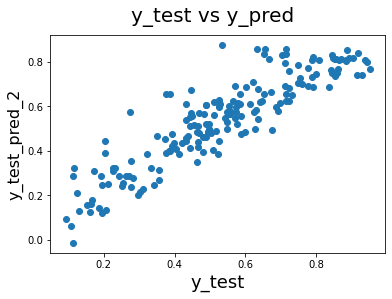

In [926]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred_2)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred_2', fontsize = 16)

From the above plot, it's evident that the model is doing well on the test set as well. Let's also check the R-squared and more importantly, the adjusted R-squared value for the test set.

In [927]:
# r2_score
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred_2)

0.8082978608887913

Thus, for the model with 9 variables, the r2_score  on training and test data is about 82.3% and 80.8% respectively. The adjusted r-squared on the test set is about is about 81.3%.

#### Checking the correlations between the final predictor variables

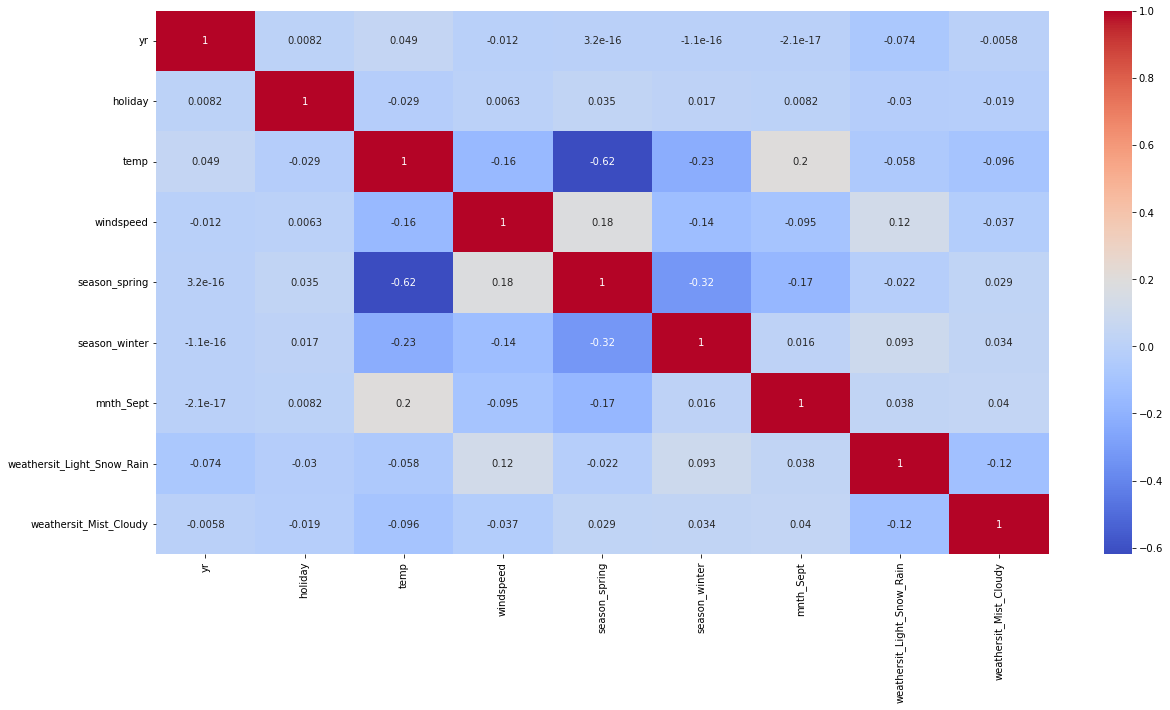

In [928]:
# Figure size
plt.figure(figsize=(20,10))

# Heatmap
sns.heatmap(house_data[X_train_rfe_2.columns].corr(), cmap="coolwarm", annot=True)
plt.show()

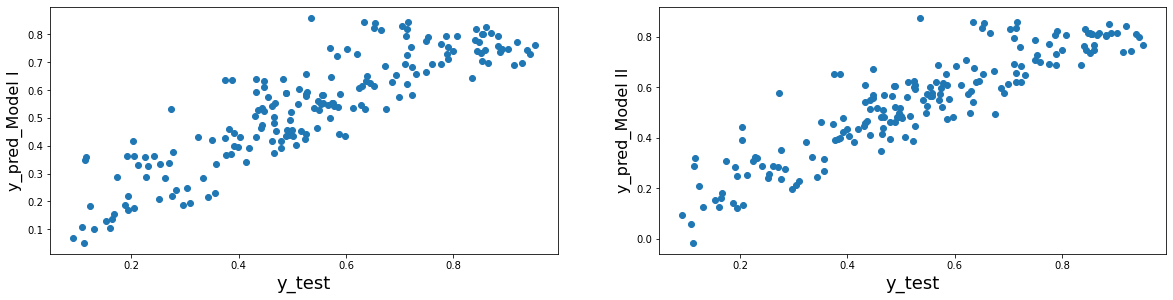

In [929]:
plt.figure(figsize=(20, 10))

plt.subplot(2,2,1)
plt.scatter(y_test, y_test_pred_1)
fig.suptitle('y_pred_Model I', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred_Model I', fontsize = 16)


plt.subplot(2,2,2)
plt.scatter(y_test, y_test_pred_2)
fig.suptitle('y_pred_Model II', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred_Model II', fontsize = 16)
plt.show()

### As you can see both models are looking pretty doing well.
But Model II spread in the scatter plot looks more appealing


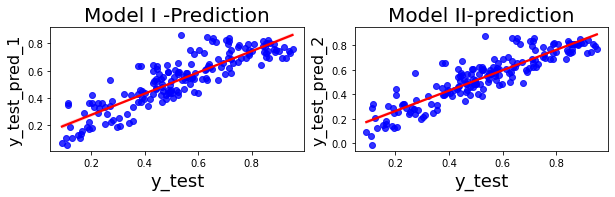

In [930]:
# Visualizing the fit on the test data
# plotting a Regression plot


plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
sns.regplot(x=y_test, y=y_test_pred_1, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Model I -Prediction', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred_1', fontsize=16)


plt.subplot(2,2,2)
sns.regplot(x=y_test, y=y_test_pred_2, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Model II-prediction', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred_2', fontsize=16)
plt.show()

We can see that the spread in Model I is pretty good than Model II

We have created Model I using a RFE(10) and Model  II using a RFE(15) and obtained the 6 and 9  feature significant variables respectively.

As we can see the fit is better in Model II , we can use Model II for the prediction


In [931]:
#Now, lets analyse the values  of both models 

#### Model 1:
- Train dataset R-squared          : 0.793
- Train dataset Adjusted R-squared : 0.791
- Train dataset r2_score           : 0.793

- Test dataset R-squared          : 0.775
- Test dataset Adjusted R-squared : 0.767
- Test dataset r2_score           : 0.769

#### Model II:
- Train dataset R-squared          : 0.824
- Train dataset Adjusted R-squared : 0.821
- Train dataset r2_score           : 0.823

- Test dataset R-squared           : 0.822
- Test dataset Adjusted R-squared  : 0.813    
- Test dataset r2_score            : 0.808

We will select  Model II  for the prediction. The final predictors in Model II seem to have fairly low correlations.

Thus, the final model consists of the 9 variables mentioned above.One can go ahead with this model and use it for predicting count of daily bike rentals.



Significant variables


In [932]:
X_train_rfe_2.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_winter',
       'mnth_Sept', 'weathersit_Light_Snow_Rain', 'weathersit_Mist_Cloudy'],
      dtype='object')

In [933]:
X_train=X_train[X_train_rfe_2.columns]

top_variables=calculate_RFE(X_train,y_train,3)
top_variables

Index(['yr', 'temp', 'weathersit_Light_Snow_Rain'], dtype='object')

Most of the data points lie on the straight line , which indicates that the error terms are normally distributed .

In [943]:
# Instantiate
lm = LinearRegression() # using sklearn

# Fit a line
lm.fit(X_train_sm_2, y_train) # find the coefficients of train set
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 0.          0.23276567 -0.09983187  0.42705551 -0.12064276 -0.12174391
  0.04547586  0.06210238 -0.26821364 -0.07190572]
0.2559525902860542


### Conclusion

The equation to predict the demand of bike provided by Model II is

cnt=0.2327*yr+-0.0998*holiday +0.427*temp +-0.120*windspeed +-121*season_spring +0.0454*season_winter +0.0621*mnth_Sept
+-0.268*weathersit_Light_Snow_Rain +-0.0719*weathersit_Mist_Cloudy

which explains that each 1 unit increase in the feature variable
- 'yr' will cause 0.2327 unit increase in bike demand count                         : positive impact

- 'holiday' will cause -0.0998 unit decrease in bike demand count                   : negative impact

- 'temperatue' will cause 0.427 unit increase in bike demand count                  :positive impact

- 'windspeed' will cause -0.120 unit decrease in bike demand count                  :negative impact

- 'season_spring' will cause -0.121 unit decrease in bike demand count              :negative impact

- 'season_winter' will cause 0.0454 unit increase in bike demand count              :positive impact

- 'mnth_Sept' will cause 0.0621 unit increase in bike demand count                  :positive impact

- 'weathersit_Light_Snow_Rain' will cause -0.268 unit decrease in bike demand count :negative impact

- 'weathersit_Mist_Cloudy' will cause -0.0719 unit decrease in bike demand count    :negative impact


#### Significant variables to predict the demand for shared bikes



Significant variables to predict the demand for shared bikes are the below which is obtained from Model II
- yr
- holiday
- temp
- windspeed
- season_spring
- season_winter
- mnth_Sept
- weathersit_Light_Snow_Rain
- weathersit_Mist_Cloudy



#### Top 3 Significant variables to predict the demand for shared bikes
- yr
- temp
- weathersit_Light_Snow_Rain'

### Analysis & Suggestions

- holidays, bad weather conditions, spring_season, windspeed can contribute less demand in bike rental. 
So company can come up with some offer program to the attract theh customer or with some loyalty programs 
where the customer can redeem loyaty while payment for using the bikes.

- We can see that each year the sales increase, so company can come up with new  strategies to improve the sales
- temperature conditions contribute towards a positive impact towards the bike rentals.
- season_winter,mnth_Sep got high demand of bike and company should make sure of providing enough bikes as per the demand.

In [1]:
#split into trin and tes
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(house_data, train_size=0.75, test_size=0.25, random_state=50)

NameError: name 'X' is not defined